<pre>
<font color = 'red'><h1><b>1. Baseline Models</b><font>

<pre>
Performing ML & DL models on this NLP problem with 8 different architectures using CNN & LSTM at various layers along with incorporating pre-trained word embedding like GloveVectors and facebook’s FastText.

<pre>
<font color = 'red'><b>Features used in this model :</b><font>
<pre>
pre_comment, pre_stop_comment, pre_stop_parent_comment, pre_parent_comment, score, ups and downs.

In [ ]:
import pandas as pd

df = pd.read_parquet('df_new.parquet')
df.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char,c_punct,pc_punct,c_tokens,pc_tokens,c_polarity,c_subjectivity,pc_polarity,pc_subjectivity
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161,0,2,2,31,0.000000,0.000000,0.100000,0.400000
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95,1,3,8,15,0.000000,0.000000,0.250000,0.200000
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166,2,4,14,30,0.166667,0.466667,0.216667,0.366667
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108,3,3,6,16,0.000000,0.000000,0.000000,0.000000
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15,1,0,1,2,0.000000,0.000000,0.000000,0.000000


<pre><font color = 'red'><h1><b>ML models</b><font>

In [ ]:
'''train_test_split'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), 
                                                    df['label'], 
                                                    test_size    = 0.20, 
                                                    random_state = 42, 
                                                    stratify     = df['label'])

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (641269, 19)
X_test  : (160318, 19)


<pre>
<font color = 'blue'><b>function to calculate metrics (i.e., accuracy, sensitivity/recall, specificity, precision, f1_score)</b><font>

In [ ]:
'''calculate_metrics'''

from sklearn.metrics import confusion_matrix

# method to calculate metrics
def calculate_metrics(y_true, y_pred):
  
    # create a dictionary with all metrics: accuracy, sensitivity (aka recall), specificity, precision and F1 score 
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred).ravel()

    # evaluation(Metrics)
    metrics_dict = {"Accuracy"             : np.round((tp + tn) / (tp + fn + fp + tn), 3),
                    "Sensitivity / Recall" : np.round(tp / (tp + fn), 3), 
                    "Specificity"          : np.round(tn / (tn + fp), 3), 
                    "Precision"            : np.round(tp / (tp + fp), 3), 
                    "F1 Score"             : np.round(2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))), 3)}
  
    
    return metrics_dict

<pre>
<font color = 'blue'><b>function to plot confusion_matrix</b><font>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

def Confusion_Matrix(y_true, y_pred):
    
    cm  =  pd.DataFrame(confusion_matrix(y_true, y_pred), 
                        index = ['Non-Sarcastic','Sarcastic'], 
                        columns = ['Non-Sarcastic','Sarcastic'])
    
    fig = plt.figure(figsize = (7, 5))

    ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
    ax.set_ylabel('True label', fontsize = 14)
    ax.set_xlabel('Predicted label', fontsize = 14)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize = 12)
    plt.show()
    
    return

<pre>
<font color = 'red'><h2><b>Model_1</b><font>

<pre>
Model : Logistic Regression, Pre-trained Embedding : TF-IDF, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_comment</b><font>

In [ ]:
##########################################[feature : "pre_comment"]################################################

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_comment'].values)

X_train_c_Tfidf = Tfidf_vectorizer.transform(X_train['pre_comment'].values)
X_test_c_Tfidf  = Tfidf_vectorizer.transform(X_test['pre_comment'].values)

print('X_train_pre_comment        :', X_train_c_Tfidf.shape)
print('X_test_pre_comment         :', X_test_c_Tfidf.shape)

X_train_pre_comment        : (641269, 50000)
X_test_pre_comment         : (160318, 50000)


<pre>
<font color = 'blue'><b>Text feature : pre_parent_comment</b><font>

In [ ]:
#######################################[feature : "pre_parent_comment"]############################################

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_parent_comment'].values)

X_train_pc_Tfidf = Tfidf_vectorizer.transform(X_train['pre_parent_comment'].values)
X_test_pc_Tfidf  = Tfidf_vectorizer.transform(X_test['pre_parent_comment'].values)

print('X_train_pre_parent_comment :', X_train_pc_Tfidf.shape)
print('X_test_pre_parent_comment  :', X_test_pc_Tfidf.shape)

X_train_pre_parent_comment : (641269, 50000)
X_test_pre_parent_comment  : (160318, 50000)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [ ]:
###############################################[score_feature]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_test_score  : ', X_test_score.shape)

#################################################[ups_feature]####################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

################################################[downs_feature]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (641269, 1)
X_test_score  :  (160318, 1)

X_train_ups   :  (641269, 1)
X_test_ups    :  (160318, 1)

X_train_downs :  (641269, 1)
X_test_downs  :  (160318, 1)


<pre>
<font color = 'blue'><b>Horizontal stacking : pre_comment, pre_parent_comment, score, ups, downs</b><font>

In [ ]:
from scipy.sparse import hstack

X_train_Tfidf = hstack((X_train_c_Tfidf,
                        X_train_pc_Tfidf,
                        X_train_score,
                        X_train_ups,
                        X_train_downs)).tocsr()

X_test_Tfidf  = hstack((X_test_c_Tfidf,
                        X_test_pc_Tfidf,
                        X_test_score,
                        X_test_ups,
                        X_test_downs)).tocsr()

# Shape
print('X_train : ', X_train_Tfidf.shape)
print('X_test  : ', X_test_Tfidf.shape)

X_train :  (641269, 100003)
X_test  :  (160318, 100003)


<pre>
<font color = 'blue'><b>Model : Logistic Regression</b><font>

Accuracy :

Train_accuracy : 0.7785921352817616
Test_accuracy  : 0.715920857296124

Evaluation :

Train : {'Accuracy': 0.779, 'Sensitivity / Recall': 0.807, 'Specificity': 0.75, 'Precision': 0.764, 'F1 Score': 0.785}
Test  : {'Accuracy': 0.716, 'Sensitivity / Recall': 0.746, 'Specificity': 0.685, 'Precision': 0.704, 'F1 Score': 0.725}

Confusion Matrix :



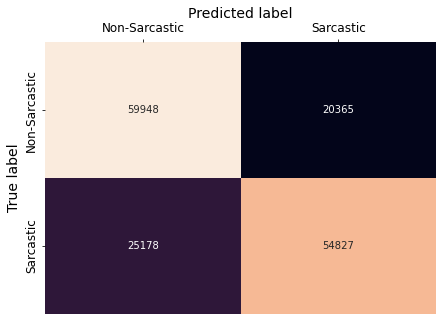

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# TRAINING
Logistic_Regression = LogisticRegression(C            = 1, 
                                         solver       = 'liblinear',
                                         n_jobs       = -1,  
                                         random_state = 42)
                                         
Logistic_Regression.fit(X_train_Tfidf, y_train)

# ACCURACY
print('Accuracy :\n')

predict_y_train   = Logistic_Regression.predict(X_train_Tfidf)
lr_train_accuracy = accuracy_score(y_train, predict_y_train)
print('Train_accuracy :', lr_train_accuracy)

predict_y_test   = Logistic_Regression.predict(X_test_Tfidf)
lr_test_accuracy = accuracy_score(y_test, predict_y_test)
print('Test_accuracy  :', lr_test_accuracy)

print('='*100)

# EVALUATION
print('\nEvaluation :\n')

print('Train :')
print(calculate_metrics(y_true = y_train, y_pred = predict_y_train))
print('\nTest  :')
print(calculate_metrics(y_true = y_test, y_pred = predict_y_test))

print('='*100)

# CONFUSION MATRIX
print('\nConfusion Matrix :\n')

Confusion_Matrix(y_true = y_test, y_pred = predict_y_test)

<pre>
<font color = 'red'><h2><b>Model_2</b><font>

<pre>
Model : Logistic Regression, Pre-trained Embedding : TF-IDF, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_stop_comment</b><font>

In [ ]:
##########################################[feature : "pre_comment"]################################################

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_stop_comment'].values)

X_train_stop_c_Tfidf = Tfidf_vectorizer.transform(X_train['pre_stop_comment'].values)
X_test_stop_c_Tfidf  = Tfidf_vectorizer.transform(X_test['pre_stop_comment'].values)

print('X_train_pre_comment        :', X_train_stop_c_Tfidf.shape)
print('X_test_pre_comment         :', X_test_stop_c_Tfidf.shape)

<pre>
<font color = 'blue'><b>Text feature : pre_stop_parent_comment</b><font>

In [ ]:
#######################################[feature : "pre_parent_comment"]############################################

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_stop_parent_comment'].values)

X_train_stop_pc_Tfidf = Tfidf_vectorizer.transform(X_train['pre_stop_parent_comment'].values)
X_test_stop_pc_Tfidf  = Tfidf_vectorizer.transform(X_test['pre_stop_parent_comment'].values)

print('\nX_train_stop_pre_parent_comment :', X_train_stop_pc_Tfidf.shape)
print('X_test_stop_pre_parent_comment  :', X_test_stop_pc_Tfidf.shape)

<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Horizontal stacking : pre_stop_comment, pre_stop_parent_comment, score, ups, downs</b><font>

In [ ]:
from scipy.sparse import hstack

# h_stack
X_train_stop_Tfidf = hstack((X_train_stop_c_Tfidf,
                             X_train_stop_pc_Tfidf,
                             X_train_score,
                             X_train_ups,
                             X_train_downs)).tocsr()

X_test_stop_Tfidf = hstack((X_test_stop_c_Tfidf,
                            X_test_stop_pc_Tfidf,
                            X_test_score,
                            X_test_ups,
                            X_test_downs)).tocsr()

# Shape
print('X_train : ', X_train_stop_Tfidf.shape)
print('X_test  : ', X_test_stop_Tfidf.shape)

X_train :  (641269, 100003)
X_test  :  (160318, 100003)


<pre>
<font color = 'blue'><b>Model : Logistic Regression</b><font>

Accuracy :

Train_accuracy : 0.7575027016743363
Test_accuracy  : 0.6899661921930164

Evaluation :

Train :
{'Accuracy': 0.758, 'Sensitivity / Recall': 0.788, 'Specificity': 0.727, 'Precision': 0.744, 'F1 Score': 0.765}

Test  :
{'Accuracy': 0.69, 'Sensitivity / Recall': 0.721, 'Specificity': 0.659, 'Precision': 0.68, 'F1 Score': 0.7}

Confusion Matrix :



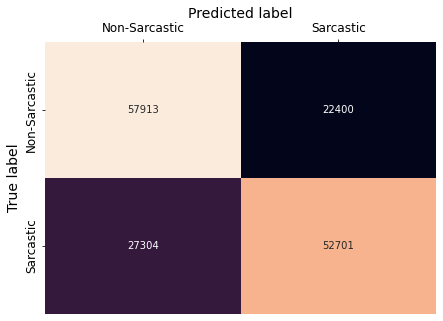

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# TRAINING
Logistic_Regression = LogisticRegression(C            = 1, 
                                         solver       = 'liblinear',
                                         n_jobs       = -1,  
                                         random_state = 42)
                                         
Logistic_Regression.fit(X_train_stop_Tfidf, y_train)

# ACCURACY
print('Accuracy :\n')

predict_y_train   = Logistic_Regression.predict(X_train_stop_Tfidf)
lr_train_accuracy = accuracy_score(y_train, predict_y_train)
print('Train_accuracy :', lr_train_accuracy)

predict_y_test   = Logistic_Regression.predict(X_test_stop_Tfidf)
lr_test_accuracy = accuracy_score(y_test, predict_y_test)
print('Test_accuracy  :', lr_test_accuracy)

print('='*100)

# EVALUATION
print('\nEvaluation :\n')

print('Train :')
print(calculate_metrics(y_true = y_train, y_pred = predict_y_train))
print('\nTest  :')
print(calculate_metrics(y_true = y_test, y_pred = predict_y_test))

print('='*100)

# CONFUSION MATRIX
print('\nConfusion Matrix :\n')

Confusion_Matrix(y_true = y_test, y_pred = predict_y_test)

<pre><font color = 'red'><h1><b>DL models</b><font>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop('label', axis = 1), 
                                                  df['label'], 
                                                  test_size    = 0.30, 
                                                  random_state = 42, 
                                                  stratify     = df['label'])

X_val, X_test, y_val, y_test = train_test_split(X_val, 
                                                y_val, 
                                                test_size    = 0.50, 
                                                random_state = 42, 
                                                stratify     = y_val)

print('X_train :', X_train.shape)
print('X_val   :', X_val.shape)
print('X_test  :', X_test.shape)

X_train : (561110, 19)
X_val   : (120238, 19)
X_test  : (120239, 19)


<pre><font color = 'blue'><b>compute_class_weight</b><font>

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes      = np.unique(df['label']),
                                     y            = df['label'])

# class_weight_dict
class_weight_dict = dict(enumerate(class_weights))

print('Class_label_weights :')
print('\nSarcastic     :', class_weight_dict[1])
print('Non-Sarcastic :', class_weight_dict[0])

Class_label_weights :

Sarcastic     : 1.0019286439245843
Non-Sarcastic : 0.998078766824798


<pre>
<font color = 'blue'><b>Convolutional Neural Network model</b><font>
<pre>
For "comment" feature,
A model with Conv1D layer 1 consisting of 50 filters and kernel size of 4
MaxPooling1D layer 1 of size 2
A model with Conv1D layer 2 consisting of 100 filters and kernel size of 3
MaxPooling1D layer 2 of size 2

For "parent_comment" feature,
A model with Conv1D layer 1 consisting of 50 filters and kernel size of 4
MaxPooling1D layer 1 of size 2
A model with Conv1D layer 2 consisting of 100 filters and kernel size of 3
MaxPooling1D layer 2 of size 2

For numerical features,
A model with Dense layer 1 consisting of 256 units

Dropout of 0.2

In [ ]:
 def cnn_model(max_length_1, vocab_size_1, embedding_size_1, embedding_matrix_1, max_length_2, vocab_size_2, embedding_size_2, embedding_matrix_2):

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs

    ################################################[comment_layer]################################################

    from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten

    # define feature
    input_layer_1 = Input(shape = (max_length_1, ),
                          name  = 'comment')

    c_embedding = Embedding(input_dim    = len(vocab_size_1) + 1,
                            output_dim   = embedding_size_1,
                            weights      = [embedding_matrix_1],
                            input_length = max_length_1,
                            trainable    = False)(input_layer_1)

    conv_1 = Conv1D(filters     = 50, 
                    kernel_size = 4, 
                    activation  = 'relu')(c_embedding)

    max_1 = MaxPooling1D(pool_size = 2)(conv_1)

    conv_2 = Conv1D(filters     = 100, 
                    kernel_size = 3, 
                    activation  = 'relu')(max_1)

    max_2 = MaxPooling1D(pool_size = 2)(conv_2)

    c_flatten = Flatten()(max_2)

    ################################################[parent_comment_layer]#########################################

    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten

    # define feature
    input_layer_2 = Input(shape = (max_length_2, ),
                          name  = 'parent_comment')

    pc_embedding = Embedding(input_dim    = len(vocab_size_2) + 1,
                             output_dim   = embedding_size_2,
                             weights      = [embedding_matrix_2],
                             input_length = max_length_2,
                             trainable    = False)(input_layer_2)

    conv_1 = Conv1D(filters     = 50, 
                    kernel_size = 4, 
                    activation  = 'relu')(pc_embedding)

    max_1 = MaxPooling1D(pool_size = 2)(conv_1)

    conv_2 = Conv1D(filters     = 100, 
                    kernel_size = 3, 
                    activation  = 'relu')(max_1)

    max_2 = MaxPooling1D(pool_size = 2)(conv_2)

    pc_flatten = Flatten()(max_2)

    ###############################################[numerical_layer]###############################################

    from tensorflow.keras.layers import Input, Dense

    #take score as input
    input_layer_3 = Input(shape = (1, ), name = 'score')
    score_dense   = Dense(units = 256, activation = 'relu')(input_layer_3)

    #take ups as input
    input_layer_4 = Input(shape = (1, ), name = 'ups')
    ups_dense     = Dense(units = 256, activation = 'relu')(input_layer_4)

    #take downs as input
    input_layer_5 = Input(shape = (1, ), name = 'downs')
    downs_dense   = Dense(units = 256, activation = 'relu')(input_layer_5)

    #################################################[concatenate]######################################################

    from tensorflow.keras.layers import concatenate

    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model

    merge = concatenate([c_flatten, pc_flatten, score_dense, ups_dense, downs_dense])

    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)

    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)

    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)

    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)

    # model
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, 
                             input_layer_3, input_layer_4, input_layer_5],
                  outputs = output_layer)

    return model

<pre>
<font color = 'blue'><b>Long Short Term Memory model</b><font>
<pre>
For "comment" feature,
LSTM layer  consisting of 100 units

For "parent_comment" feature,
LSTM layer  consisting of 100 units

For numerical features,
Dense layer 1 consisting of 256 units

Dropout of 0.2

In [ ]:
def lstm_model(max_length_1, vocab_size_1, embedding_size_1, embedding_matrix_1, max_length_2, vocab_size_2, embedding_size_2, embedding_matrix_2):

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    
    ################################################[comment_layer]################################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_1 = Input(shape = (max_length_1, ),
                          name  = 'comment')
    
    c_feature = Embedding(input_dim    = len(vocab_size_1) + 1,
                          output_dim   = embedding_size_1,
                          weights      = [embedding_matrix_1],
                          input_length = max_length_1,
                          trainable    = False)(input_layer_1)
    
    c_feature = LSTM(100)(c_feature)
    c_flatten = Flatten()(c_feature)
    
    ################################################[parent_comment_layer]########################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_2 = Input(shape = (max_length_2, ),
                          name  = 'parent_comment')
    
    pc_feature = Embedding(input_dim    = len(vocab_size_2) + 1,
                           output_dim   = embedding_size_2,
                           weights      = [embedding_matrix_2],
                           input_length = max_length_2,
                           trainable    = False)(input_layer_2)
    
    pc_feature = LSTM(100)(pc_feature)
    pc_flatten = Flatten()(pc_feature)
    
    ###############################################[numerical_layer]##############################################
    
    from tensorflow.keras.layers import Input, Dense
    
    #take score as input
    input_layer_3 = Input(shape = (1, ), name = 'score')
    score_dense = Dense(units = 256, activation = 'relu')(input_layer_3)
    
    #take ups as input
    input_layer_4 = Input(shape = (1, ), name = 'ups')
    ups_dense = Dense(units = 256, activation = 'relu')(input_layer_4)
    
    #take downs as input
    input_layer_5 = Input(shape = (1, ), name = 'downs')
    downs_dense = Dense(units = 256, activation = 'relu')(input_layer_5)
    
    ###############################################[concatenate]##################################################
    
    from tensorflow.keras.layers import concatenate
    
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model
    
    merge = concatenate([c_flatten, 
                         pc_flatten, 
                         score_dense, ups_dense, downs_dense])
    
    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)
    
    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)
    
    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)
    
    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)
    # Model_1
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, 
                             input_layer_3, input_layer_4, input_layer_5],
                    outputs = output_layer)

    return model

<pre><font color = 'blue'><b>callbacks</b><font>

In [ ]:
###############################################[EarlyStopping]##################################################

from tensorflow.keras.callbacks import EarlyStopping

# Stop training when a definite metric no longer improves.
Early_Stopping = EarlyStopping(patience             = 5,
                               monitor              = 'val_accuracy',
                               min_delta            = 0.001,
                               restore_best_weights = True)

###############################################[ReduceLROnPlateau]##############################################

from tensorflow.keras.callbacks import ReduceLROnPlateau

# When a specific metric stop improving, decrease the learning rate.
ReduceLR_On_Plateau = ReduceLROnPlateau(monitor  = 'val_accuracy', 
                                        factor   = 0.2,
                                        patience = 5, 
                                        min_lr   = 0.001)

###############################################[LearningRateScheduler]###########################################

from tensorflow.keras.callbacks import LearningRateScheduler

# The learning rate will be modified whenever a new epoch starts (based on a function).
def lr_time_based_decay(epoch, lr):

    epochs = 100
    initial_learning_rate = 0.01
    decay = initial_learning_rate / epochs

    #
    calculate = lr * 1 / (1 + decay * epoch)

    return calculate

Learning_Rate_Scheduler = LearningRateScheduler(lr_time_based_decay, verbose = 1)

#
callbacks_list = [Early_Stopping, ReduceLR_On_Plateau, Learning_Rate_Scheduler]

<pre><font color = 'blue'><b>function to calculate metrics (i.e., precision, recall and f1_score)</b><font>

In [ ]:
from tensorflow.keras import backend as K

###############################################[precision]##############################################

def precision(y_true, y_pred):

    true_positives      = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision           = true_positives / (predicted_positives + K.epsilon())
   
    return precision

################################################[recall]###############################################

def recall(y_true, y_pred):

    true_positives     = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall             = true_positives / (possible_positives + K.epsilon())
   
    return recall

###############################################[f1_score]###############################################

def f1_score(y_true, y_pred):

    precision_ = precision(y_true, y_pred)
    recall_    = recall(y_true, y_pred)
    f1_score   = 2*((precision_ * recall_)/(precision_ + recall_ + K.epsilon()))

    return f1_score

<pre><font color = 'blue'><b>function to plot metircs (i,e., loss, accuracy, precision, recall and f1_score)</b><font>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

def plot_metric(model_name, history, metric):
    
    plt.figure(figsize = (7, 5))
    sns.set(font_scale = 1.5) 

    train_metrics = history.history[metric]
    test_metrics  = history.history['val_' + metric]
    epochs        = range(1, len(train_metrics) + 1)
    
    sns.lineplot(y      = train_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'train_'+metric)

    sns.lineplot(y      = test_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'test_'+metric)

    plt.legend()

    plt.ylabel(metric)
    plt.xlabel('epochs')
    plt.title(model_name + ' model - ' + metric + ' graph')
    plt.show()

<pre>
<font color = 'red'><h2><b>Model_3, Model_4, Model_5 & Model_6</b><font>

<pre><font color = 'blue'><b>Glove Vectors</b><font>

In [ ]:
# Glove Vectors link : https://www.kaggle.com/datasets/takuok/glove840b300dtxt

import numpy as np
from tqdm import tqdm

#
embeddings_index = {}

with open('glove.840B.300d.txt', encoding = 'utf-8') as f:
    for line in tqdm(f):
        values = line.split(' ')
        word   = values[0]
        coords = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = coords

print('Found %s word vectors.' % len(embeddings_index))

<pre>
<font color = 'red'><h2><b>Model_3</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Glove Vectors, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text features : pre_comment</b><font>

In [ ]:
############################################[feature : pre_comment]################################################

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]##################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135105


2196018it [01:59, 18433.18it/s]


Found 2196017 word vectors.

Embedding_matrix_shape : (135106, 300)


<pre>
<font color = 'blue'><b>Text features : pre_parent_comment</b><font>

In [ ]:
##########################################[feature : pre_parent_comment]###########################################

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199914


2196018it [02:11, 16718.48it/s]


Found 2196017 word vectors.

Embedding_matrix_shape : (199915, 300)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [ ]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [ ]:
Model_1 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

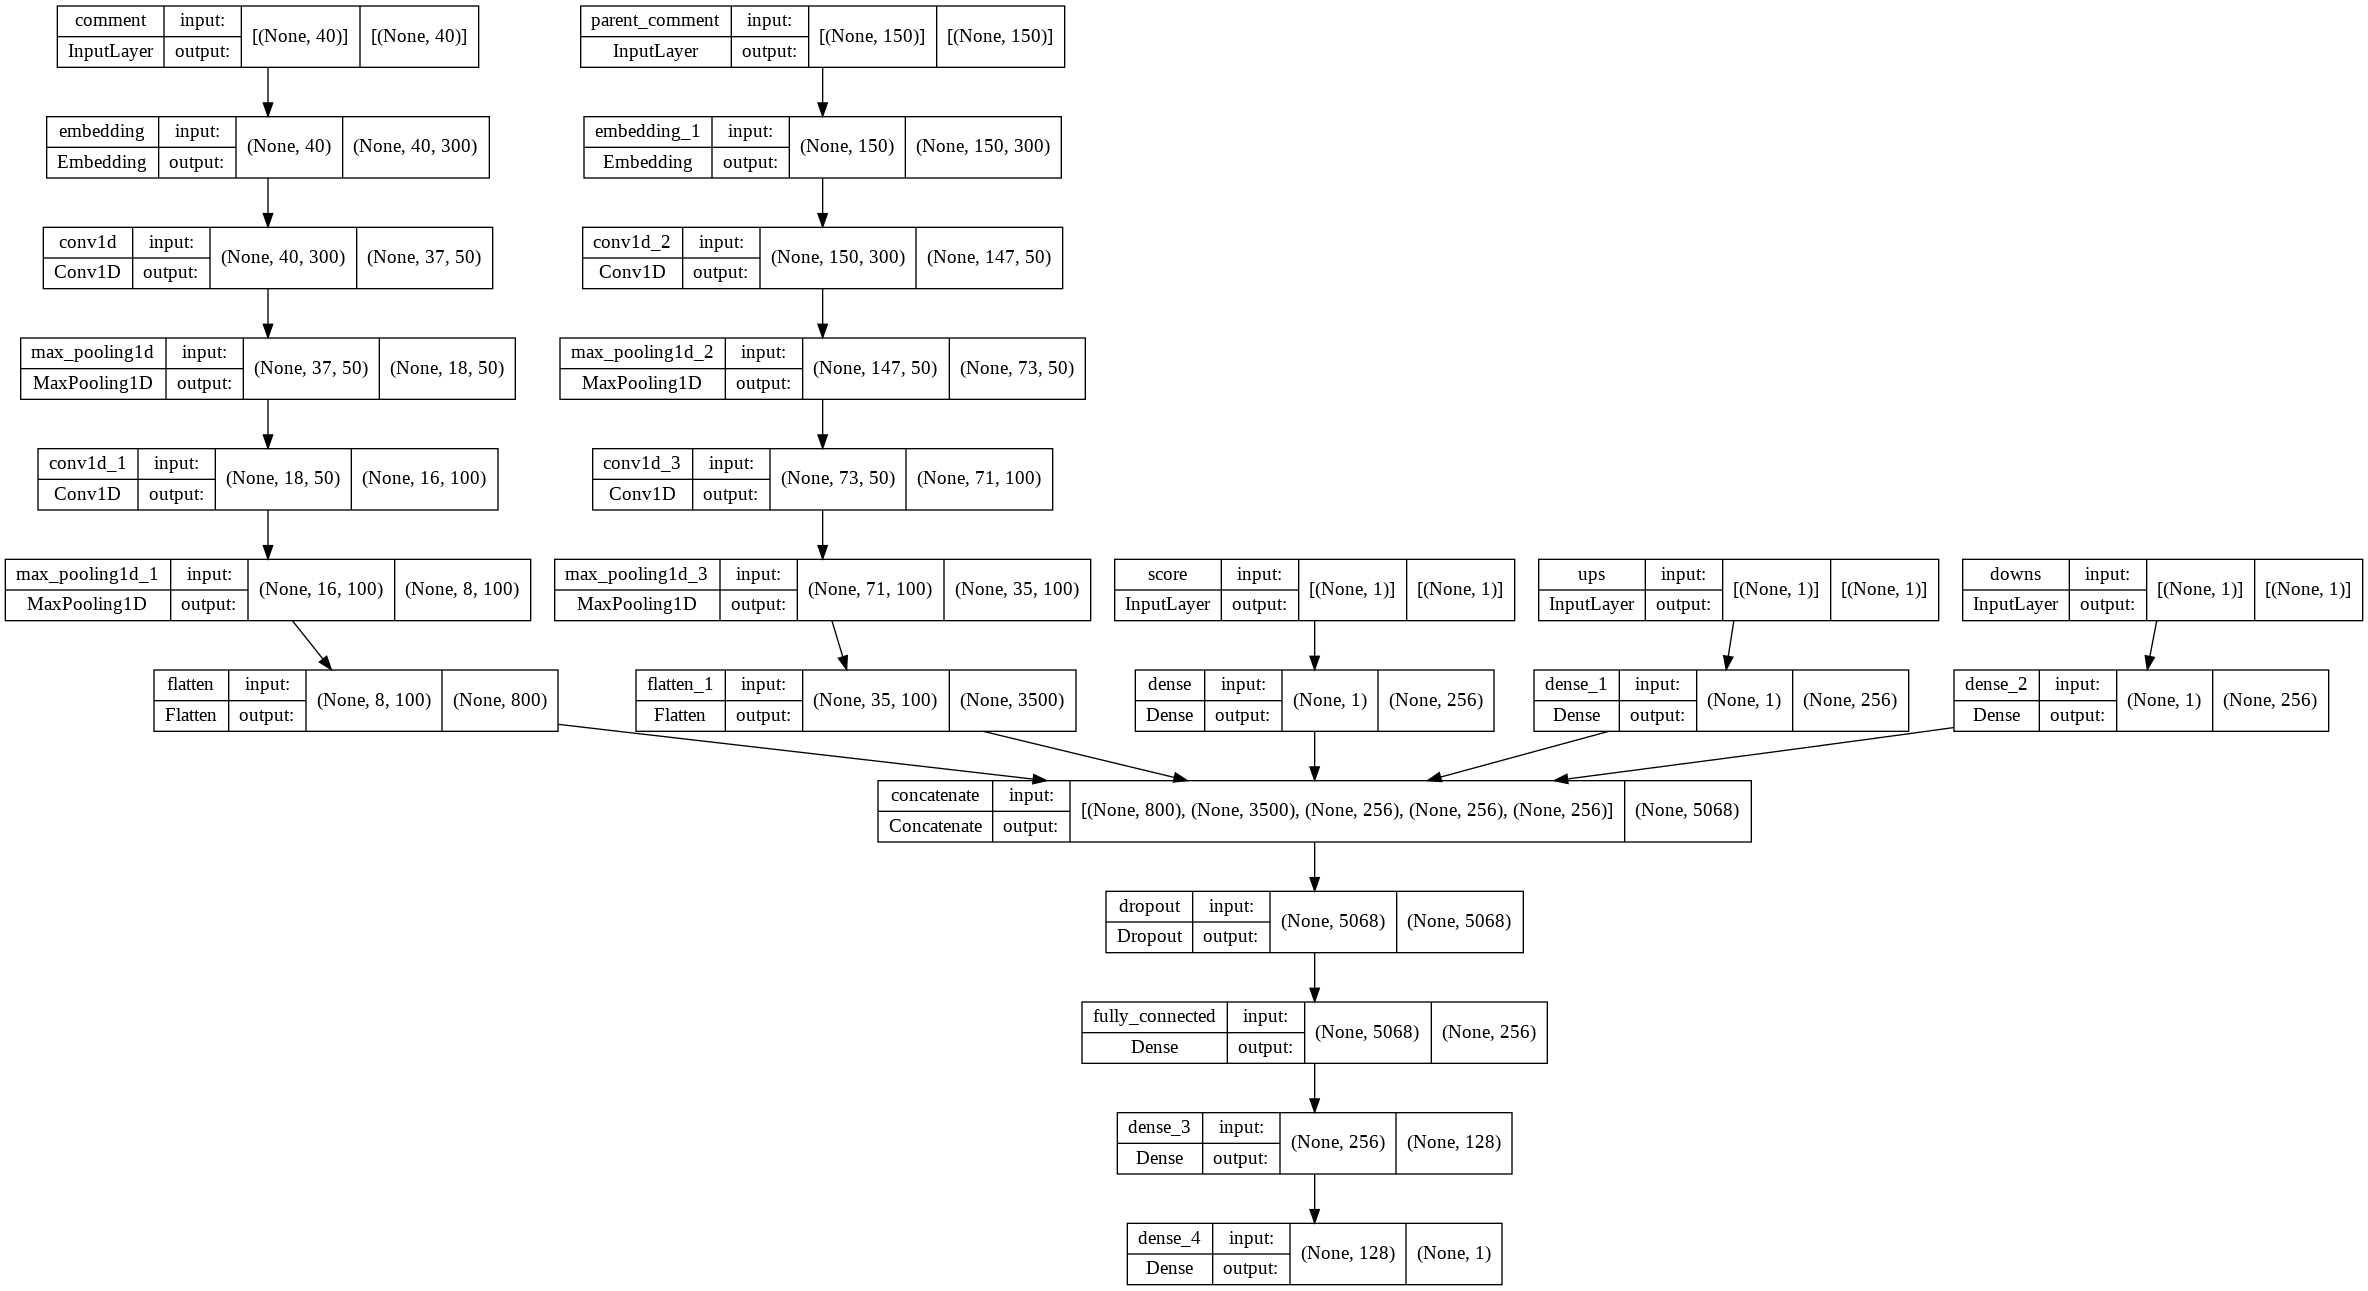

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_1,
           to_file = 'Model_1.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_1.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_padding, 
                X_train_pc_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_pc_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_pc_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_1 = Model_1.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 56s 70ms/step - loss: 0.5998 - accuracy: 0.6707 - precision: 0.6959 - recall: 0.6171 - f1_score: 0.6504 - val_loss: 0.5745 - val_accuracy: 0.6942 - val_precision: 0.7228 - val_recall: 0.6284 - val_f1_score: 0.6720 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 36s 66ms/step - loss: 0.5651 - accuracy: 0.7038 - precision: 0.7303 - recall: 0.6482 - f1_score: 0.6851 - val_loss: 0.5639 - val_accuracy: 0.7044 - val_precision: 0.7448 - val_recall: 0.6202 - val_f1_score: 0.6766 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 36s 66ms/step - loss: 0.5504 - accuracy: 0.7158 - precision: 0.7409 - recall: 0.6666 - f1_score: 0.6998 - val_loss: 0.5609 - val_accuracy: 0.

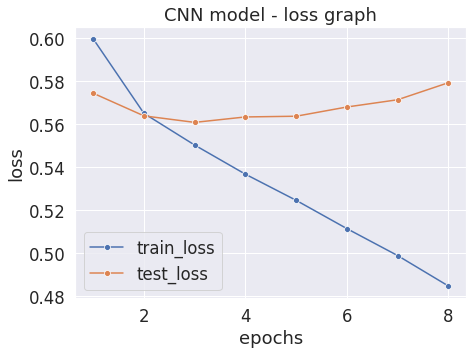

In [ ]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'loss')

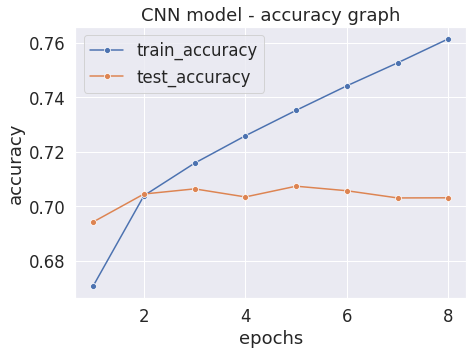

In [ ]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'accuracy')

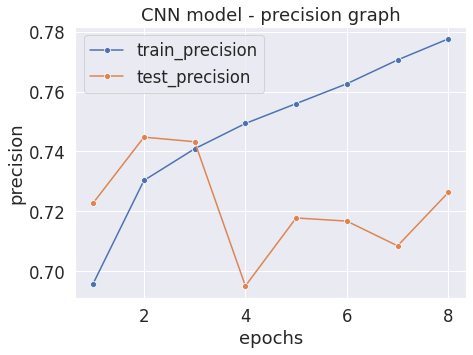

In [ ]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'precision')

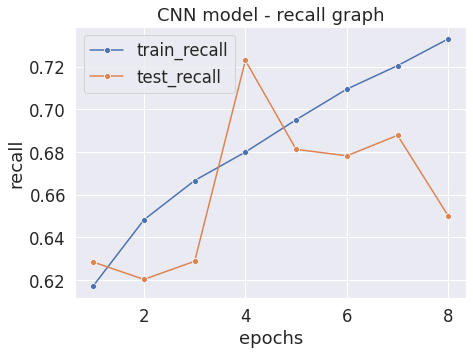

In [ ]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'recall')

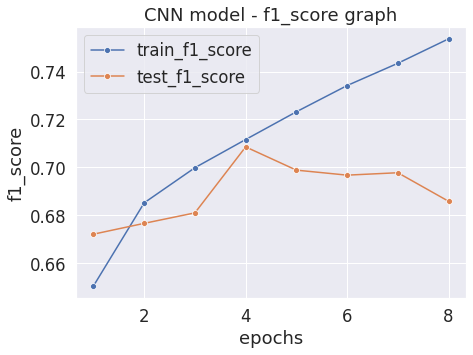

In [ ]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_1.save_weights('/content/drive/MyDrive/Model_1_weights.hdf5')

In [ ]:
'''load_weights'''

Model_1.load_weights('/content/drive/MyDrive/Model_1_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_1.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 116s 7ms/step - loss: 0.5276 - accuracy: 0.7333 - precision: 0.7725 - recall: 0.6590 - f1_score: 0.7042


In [ ]:
l, a, p, r, f = Model_1.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 23s 6ms/step - loss: 0.5609 - accuracy: 0.7063 - precision: 0.7431 - recall: 0.6286 - f1_score: 0.6737


In [ ]:
l, a, p, r, f = Model_1.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 17s 5ms/step - loss: 0.5620 - accuracy: 0.7056 - precision: 0.7430 - recall: 0.6277 - f1_score: 0.6726


In [ ]:
# predicted value
y_pred  = Model_1.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 14s 4ms/step


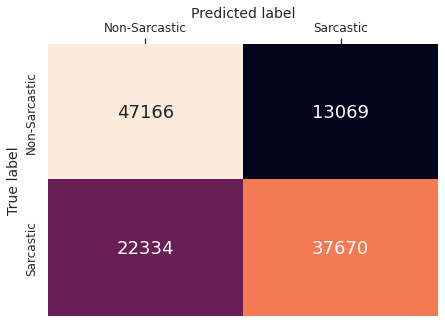

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_4</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Glove Vectors, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font> same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [ ]:
Model_2 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

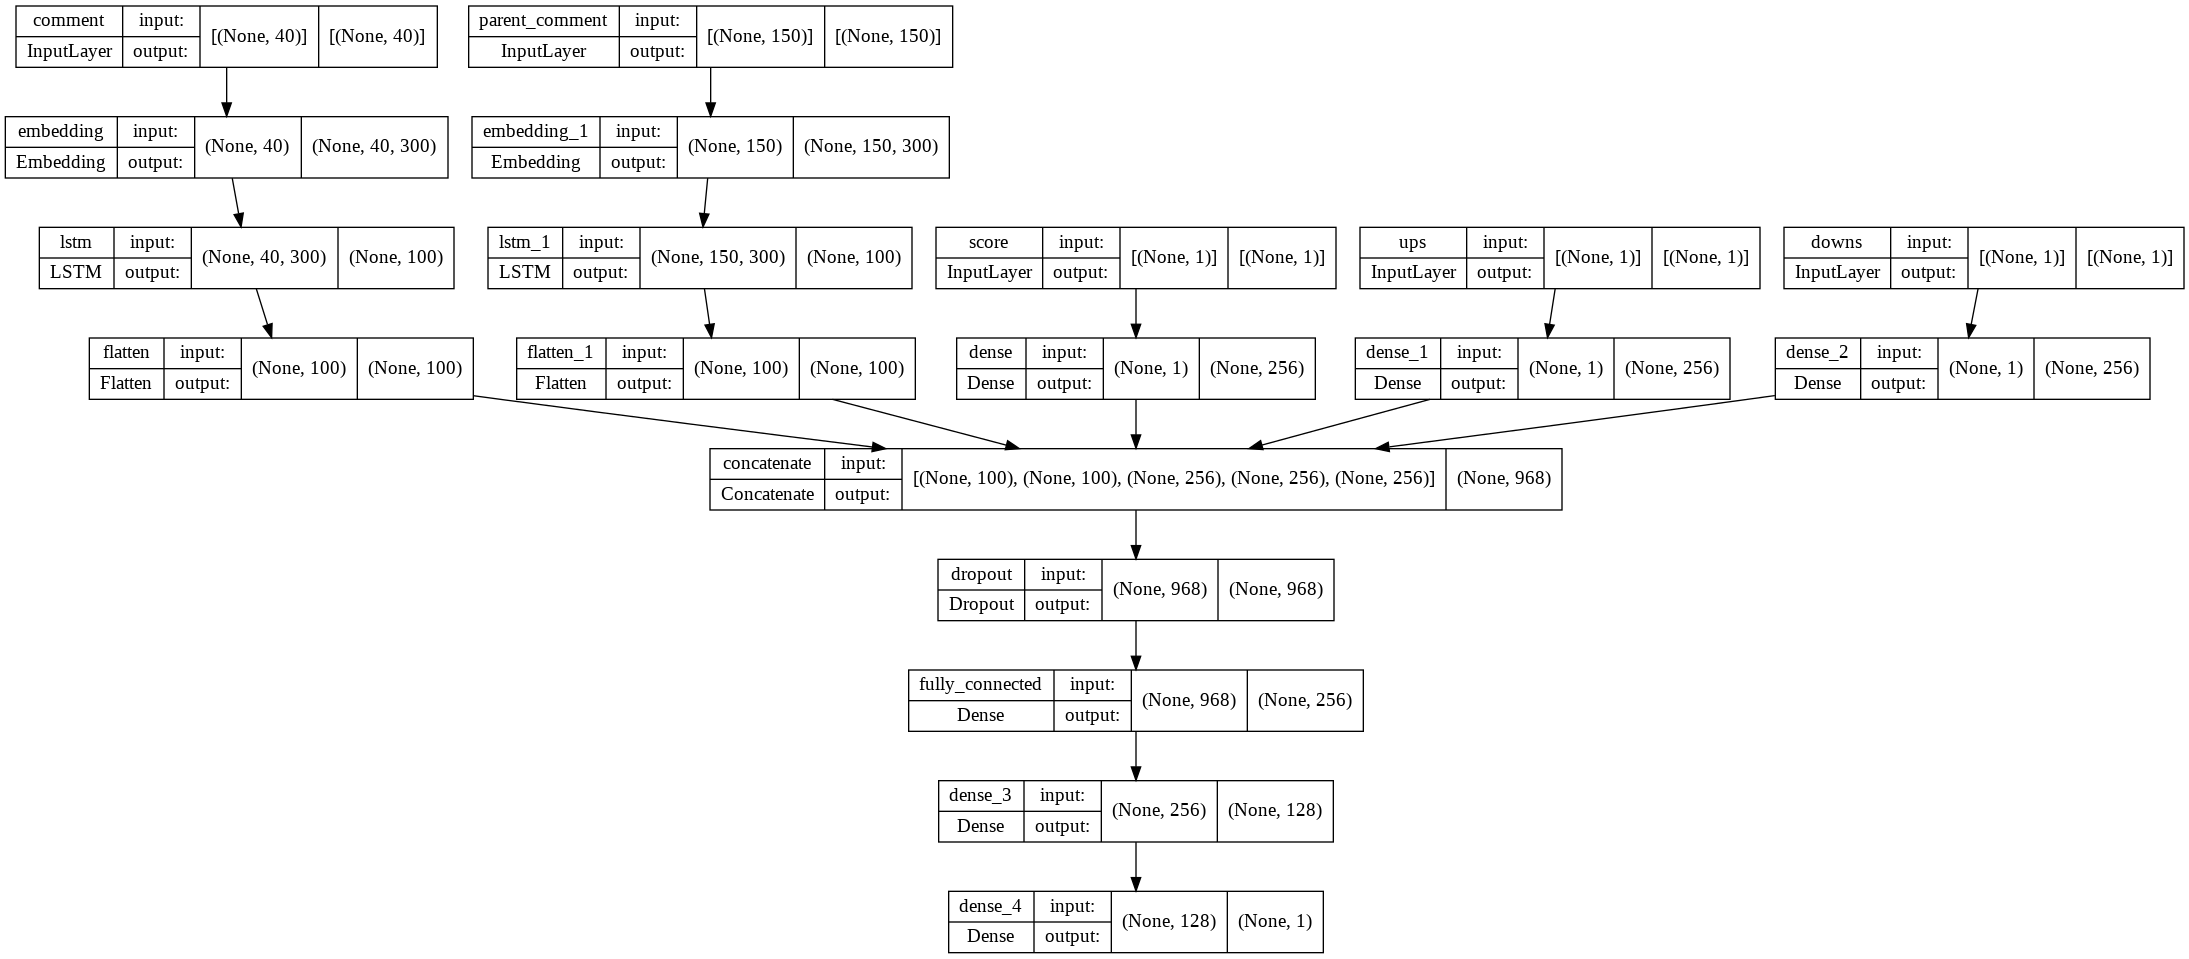

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_2,
           to_file = 'Model_2.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_2.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_padding, 
                X_train_pc_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_pc_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_pc_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_2 = Model_2.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 58s 97ms/step - loss: 0.5889 - accuracy: 0.6815 - precision: 0.6967 - recall: 0.6499 - f1_score: 0.6695 - val_loss: 0.5557 - val_accuracy: 0.7099 - val_precision: 0.7445 - val_recall: 0.6376 - val_f1_score: 0.6867 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 52s 95ms/step - loss: 0.5465 - accuracy: 0.7177 - precision: 0.7381 - recall: 0.6772 - f1_score: 0.7046 - val_loss: 0.5460 - val_accuracy: 0.7199 - val_precision: 0.7771 - val_recall: 0.6146 - val_f1_score: 0.6862 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 54s 98ms/step - loss: 0.5294 - accuracy: 0.7308 - precision: 0.7503 - recall: 0.6936 - f1_score: 0.7194 - val_loss: 0.5326 - val_accuracy: 0.

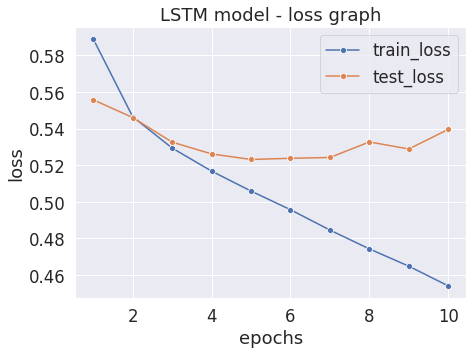

In [ ]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'loss')

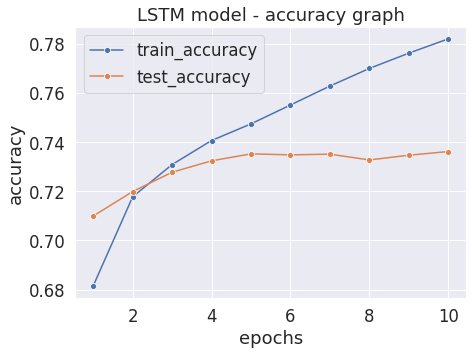

In [ ]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'accuracy')

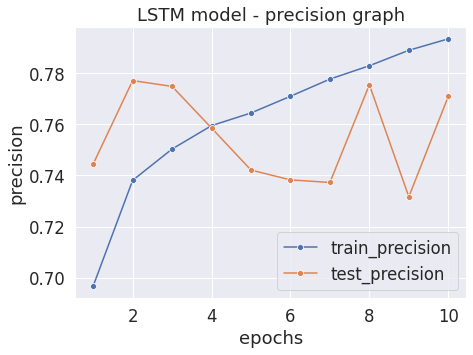

In [ ]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'precision')

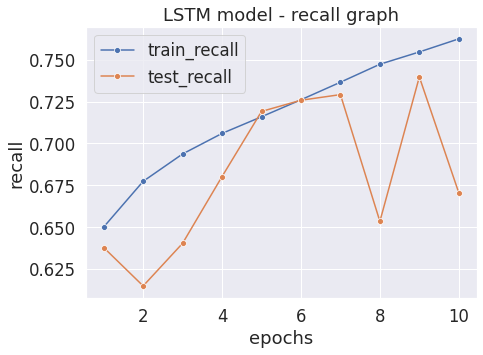

In [ ]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'recall')

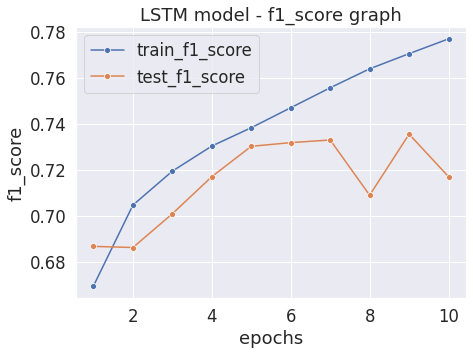

In [ ]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_2.save_weights('/content/drive/MyDrive/Model_2_weights.hdf5')

In [ ]:
'''load_weights'''

Model_2.load_weights('/content/drive/MyDrive/Model_2_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_2.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 133s 8ms/step - loss: 0.4853 - accuracy: 0.7638 - precision: 0.7691 - recall: 0.7523 - f1_score: 0.7546


In [ ]:
l, a, p, r, f = Model_2.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 28s 7ms/step - loss: 0.5231 - accuracy: 0.7352 - precision: 0.7422 - recall: 0.7192 - f1_score: 0.7241


In [ ]:
l, a, p, r, f = Model_2.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 28s 7ms/step - loss: 0.5234 - accuracy: 0.7356 - precision: 0.7425 - recall: 0.7210 - f1_score: 0.7252


In [ ]:
# predicted value
y_pred  = Model_2.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 23s 6ms/step


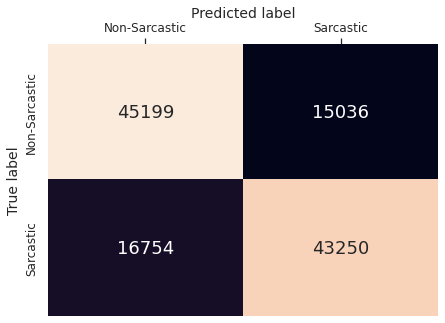

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_5</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Glove Vectors, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text features : pre_stop_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_stop_comment'].values)

# texts_to_sequences
X_train_c_sequences    = tokenizer_c.texts_to_sequences(X_train['pre_stop_comment'].values)
X_train_c_stop_padding = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences    = tokenizer_c.texts_to_sequences(X_val['pre_stop_comment'].values)
X_val_c_stop_padding = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences    = tokenizer_c.texts_to_sequences(X_test['pre_stop_comment'].values)
X_test_c_stop_padding = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_stop_padding.shape)
print('X_val   : ', X_val_c_stop_padding.shape)
print('X_test  : ', X_test_c_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135102


2196018it [01:57, 18708.24it/s]


Found 2196017 word vectors.

Embedding_matrix_shape : (135103, 300)


<pre>
<font color = 'blue'><b>Text features : pre_stop_parent_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_stop_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_stop_parent_comment'].values)
X_train_pc_stop_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_stop_parent_comment'].values)
X_val_pc_stop_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_stop_parent_comment'].values)
X_test_pc_stop_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_stop_padding.shape)
print('X_val   : ', X_val_pc_stop_padding.shape)
print('X_test  : ', X_test_pc_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199910


2196018it [01:57, 18763.89it/s]


Found 2196017 word vectors.

Embedding_matrix_shape : (199911, 300)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [ ]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [ ]:
Model_3 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

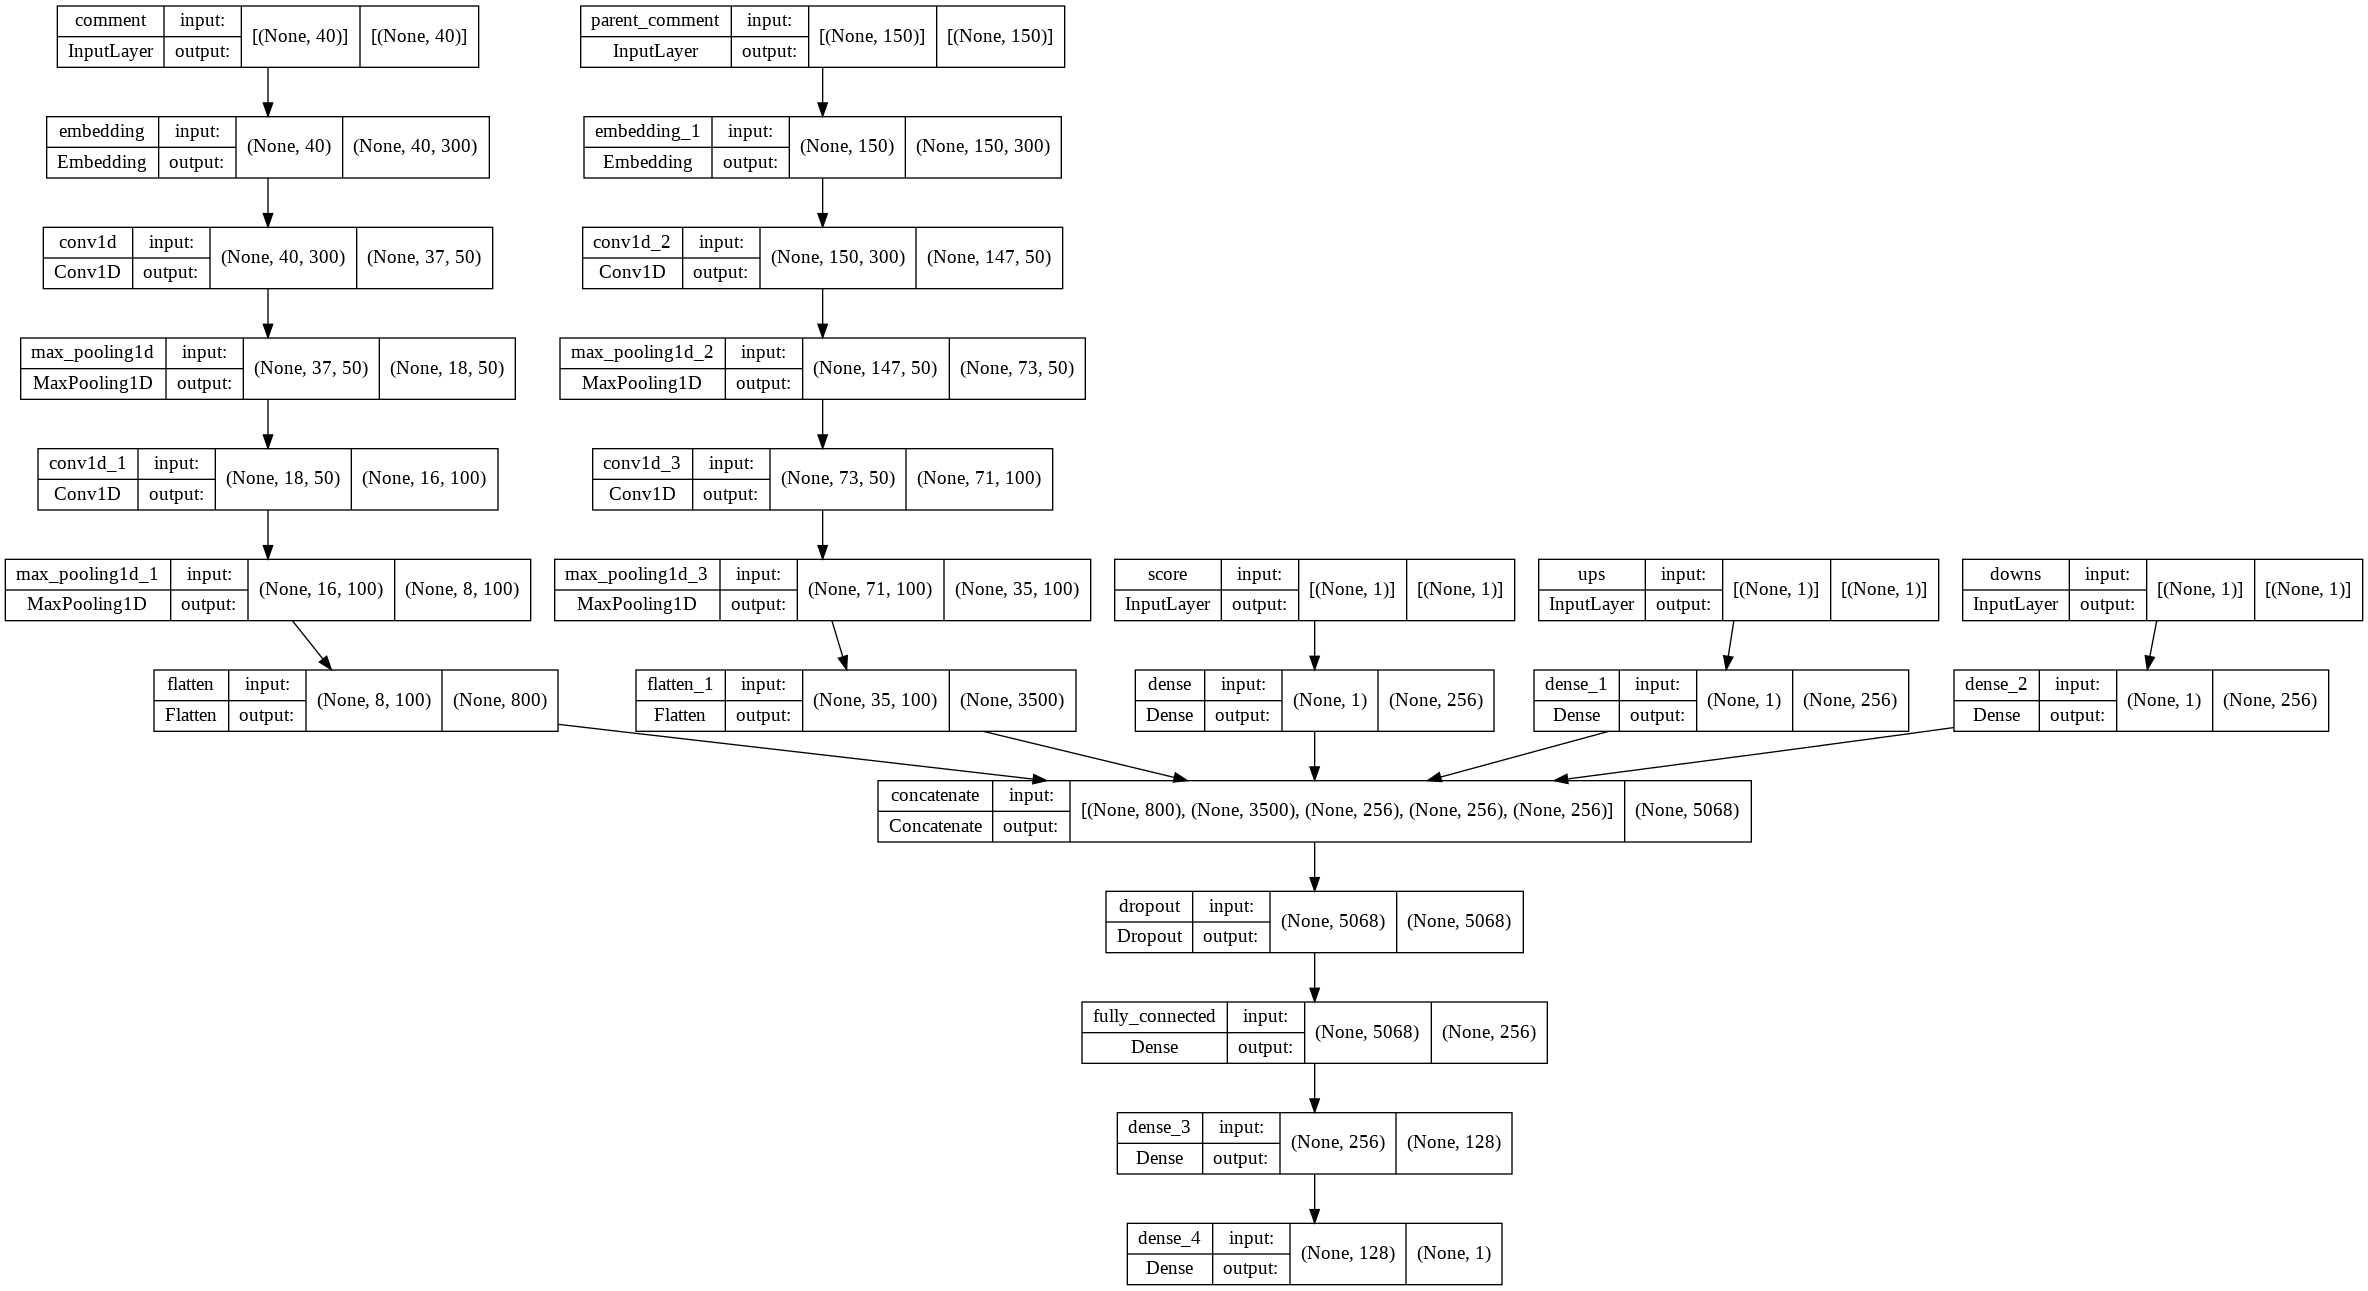

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_3,
           to_file = 'Model_3.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_3.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_stop_padding, 
                X_train_pc_stop_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_pc_stop_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_pc_stop_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_3 = Model_3.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 37s 62ms/step - loss: 0.6258 - accuracy: 0.6426 - precision: 0.6625 - recall: 0.5883 - f1_score: 0.6196 - val_loss: 0.6103 - val_accuracy: 0.6618 - val_precision: 0.6869 - val_recall: 0.5922 - val_f1_score: 0.6359 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 33s 61ms/step - loss: 0.5997 - accuracy: 0.6723 - precision: 0.6933 - recall: 0.6179 - f1_score: 0.6524 - val_loss: 0.6034 - val_accuracy: 0.6675 - val_precision: 0.7013 - val_recall: 0.5811 - val_f1_score: 0.6354 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 33s 61ms/step - loss: 0.5857 - accuracy: 0.6850 - precision: 0.7054 - recall: 0.6353 - f1_score: 0.6675 - val_loss: 0.6055 - val_accuracy: 0.

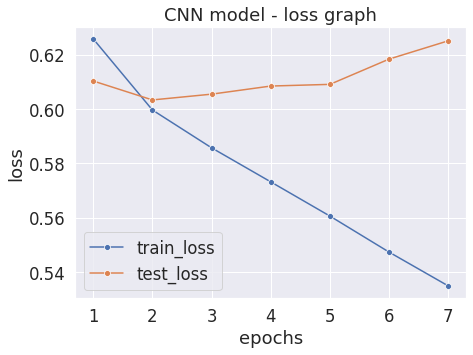

In [ ]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'loss')

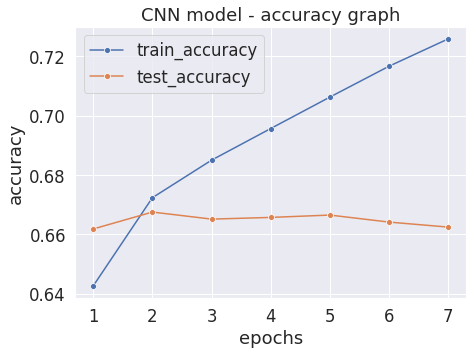

In [ ]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'accuracy')

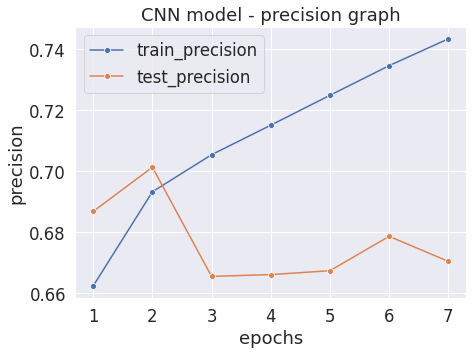

In [ ]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'precision')

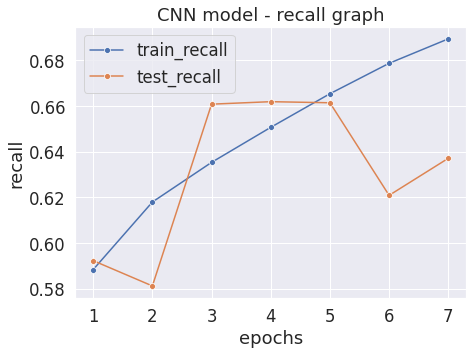

In [ ]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'recall')

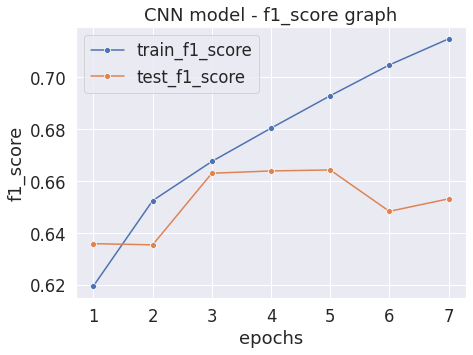

In [ ]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_3.save_weights('/content/drive/MyDrive/Model_3_weights.hdf5')

In [ ]:
'''load_weights'''

Model_3.load_weights('/content/drive/MyDrive/Model_3_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_3.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 98s 6ms/step - loss: 0.5817 - accuracy: 0.6906 - precision: 0.7271 - recall: 0.6080 - f1_score: 0.6543


In [ ]:
l, a, p, r, f = Model_3.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 18s 5ms/step - loss: 0.6034 - accuracy: 0.6675 - precision: 0.7015 - recall: 0.5811 - f1_score: 0.6278


In [ ]:
l, a, p, r, f = Model_3.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 17s 5ms/step - loss: 0.6050 - accuracy: 0.6657 - precision: 0.6982 - recall: 0.5812 - f1_score: 0.6260


In [ ]:
# predicted value
y_pred  = Model_3.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 11s 3ms/step


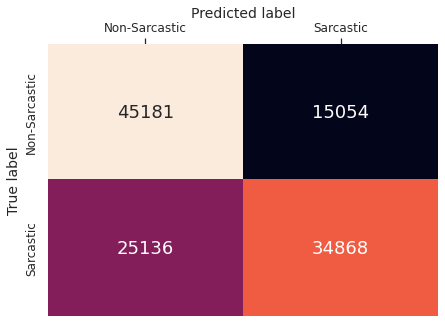

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_6</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Glove Vectors, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [ ]:
Model_4 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

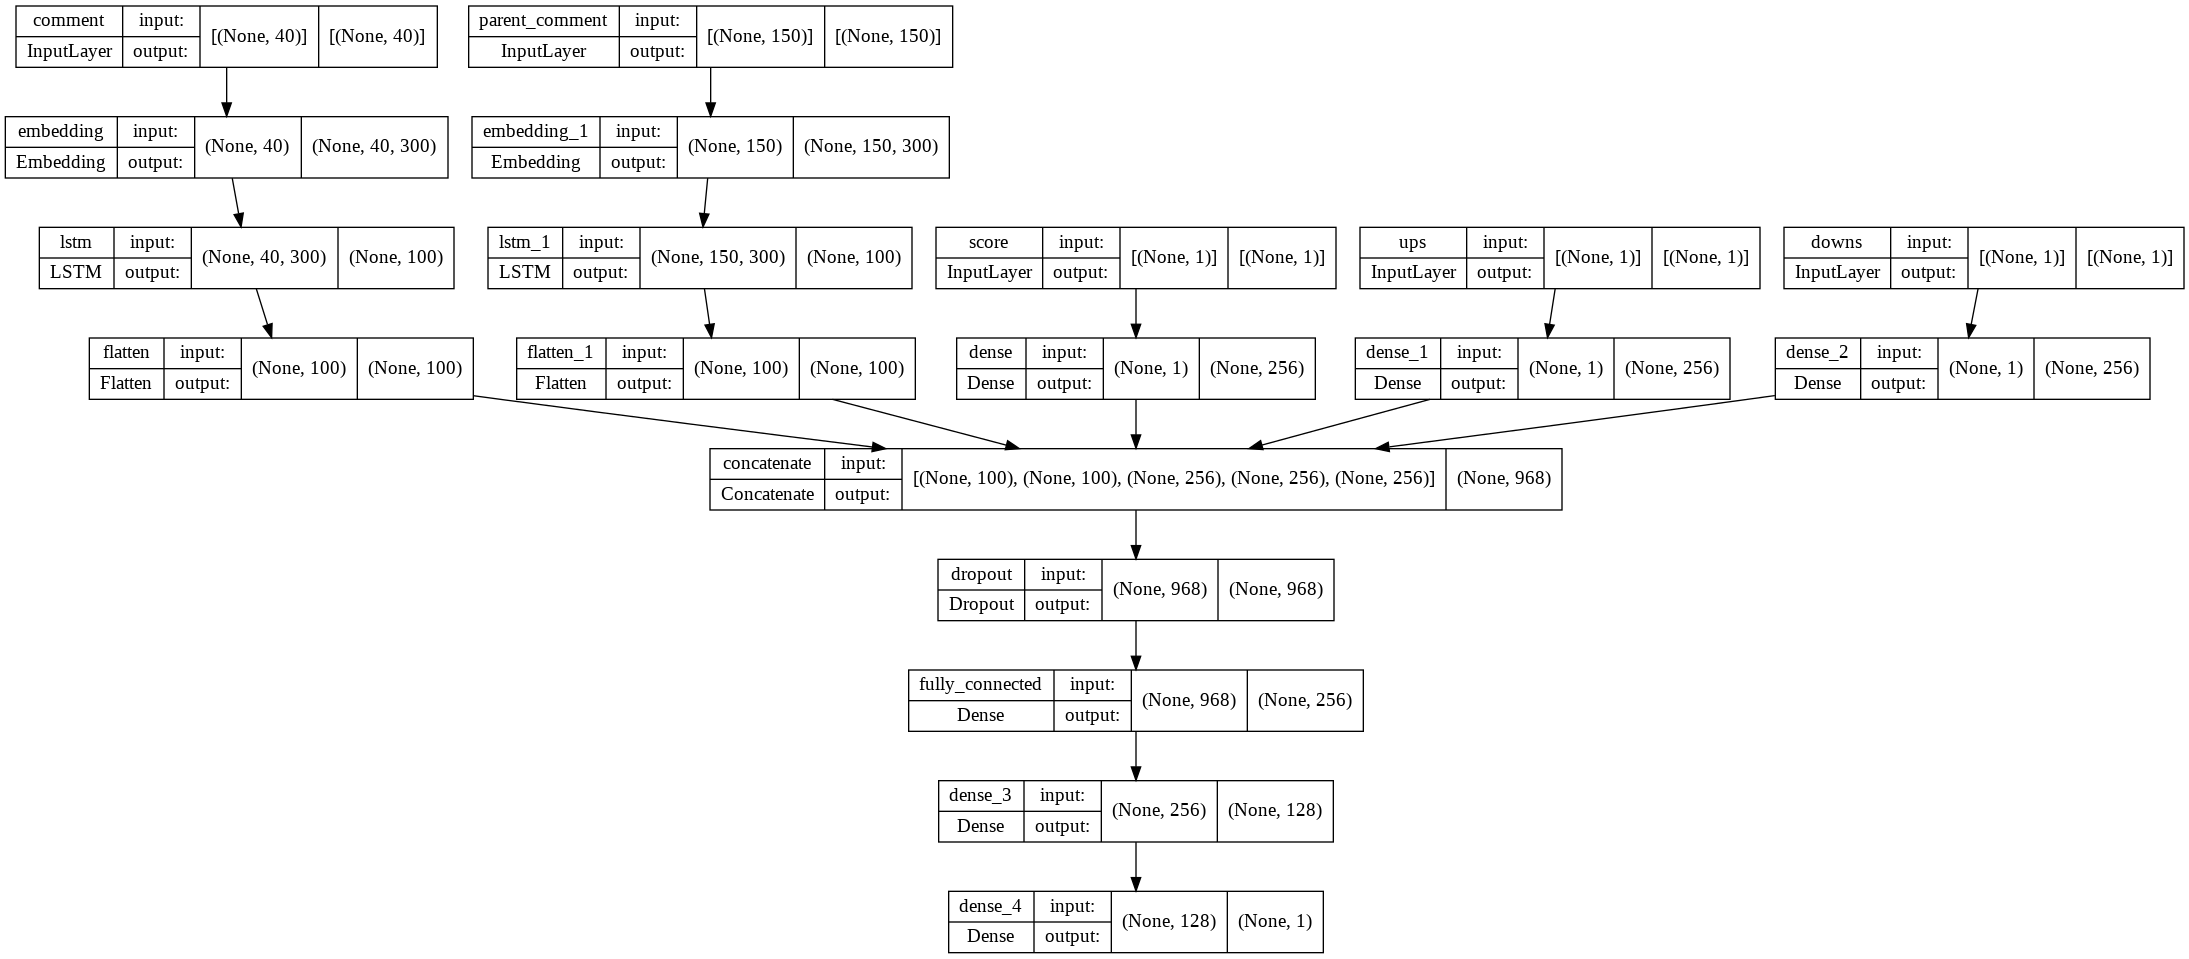

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_4,
           to_file = 'Model_4.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_4.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_stop_padding, 
                X_train_pc_stop_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_pc_stop_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_pc_stop_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_4 = Model_4.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 59s 94ms/step - loss: 0.6032 - accuracy: 0.6685 - precision: 0.6836 - recall: 0.6307 - f1_score: 0.6543 - val_loss: 0.5787 - val_accuracy: 0.6903 - val_precision: 0.7040 - val_recall: 0.6546 - val_f1_score: 0.6782 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 53s 96ms/step - loss: 0.5684 - accuracy: 0.6996 - precision: 0.7174 - recall: 0.6589 - f1_score: 0.6858 - val_loss: 0.5664 - val_accuracy: 0.7000 - val_precision: 0.7303 - val_recall: 0.6322 - val_f1_score: 0.6775 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 52s 95ms/step - loss: 0.5532 - accuracy: 0.7126 - precision: 0.7291 - recall: 0.6767 - f1_score: 0.7010 - val_loss: 0.5607 - val_accuracy: 0.

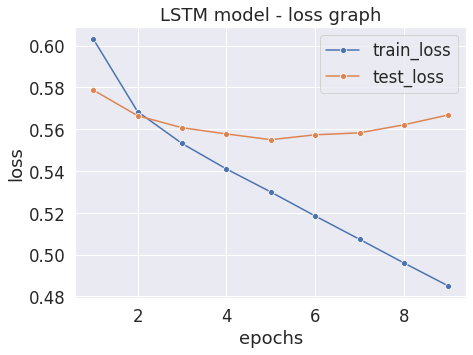

In [ ]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'loss')

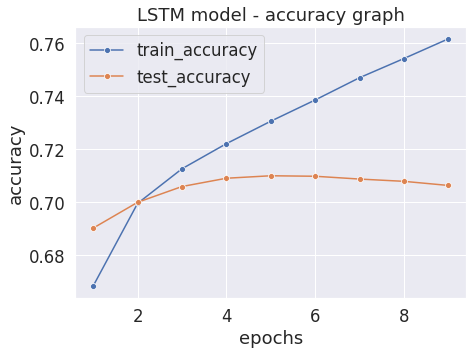

In [ ]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'accuracy')

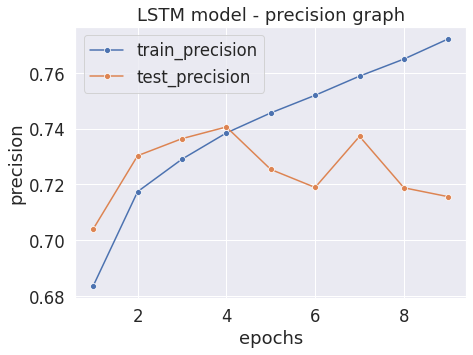

In [ ]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'precision')

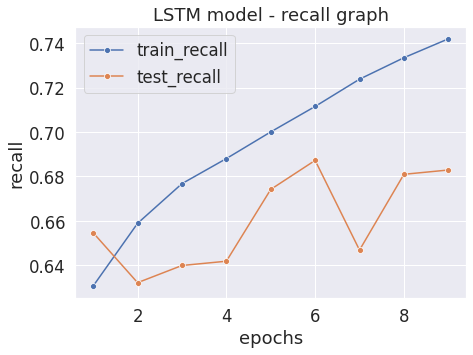

In [ ]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'recall')

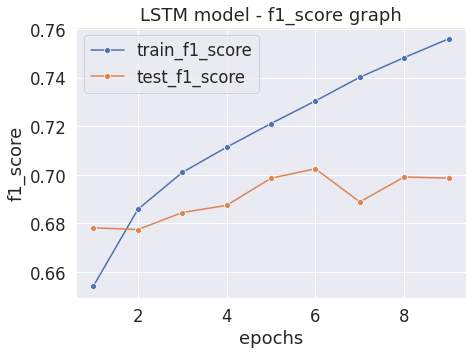

In [ ]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_4.save_weights('/content/drive/MyDrive/Model_4_weights.hdf5')

In [ ]:
'''load_weights'''

Model_4.load_weights('/content/drive/MyDrive/Model_4_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_4.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 131s 7ms/step - loss: 0.5204 - accuracy: 0.7374 - precision: 0.7707 - recall: 0.6739 - f1_score: 0.7120


In [ ]:
l, a, p, r, f = Model_4.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 28s 8ms/step - loss: 0.5577 - accuracy: 0.7090 - precision: 0.7410 - recall: 0.6420 - f1_score: 0.6805


In [ ]:
l, a, p, r, f = Model_4.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 27s 7ms/step - loss: 0.5583 - accuracy: 0.7082 - precision: 0.7386 - recall: 0.6432 - f1_score: 0.6801


In [ ]:
# predicted value
y_pred  = Model_4.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 22s 6ms/step


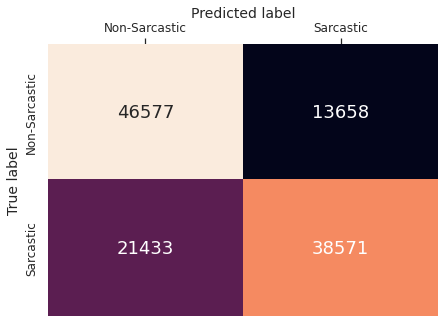

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_7, Model_8, Model_9 & Model_10</b><font>

<pre><font color = 'blue'><b>Fast Text</b><font>

In [ ]:
# FastText link : https://www.kaggle.com/datasets/yekenot/fasttext-crawl-300d-2m

import numpy as np

#
ft_path = r'crawl-300d-2M.vec'

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs( * o.rstrip().rsplit(' ')) for o in open(ft_path,'r',encoding = 'utf-8'))

print('Found %s word vectors.' % len(embeddings_index))

Found 2000000 word vectors.


<pre>
<font color = 'red'><h2><b>Model_7</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Fast Text, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135105
Found 2000000 word vectors.

Embedding_matrix_shape : (135106, 300)


<pre>
<font color = 'blue'><b>Text feature : pre_parent_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199914

Embedding_matrix_shape : (199915, 300)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [ ]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [ ]:
Model_5 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

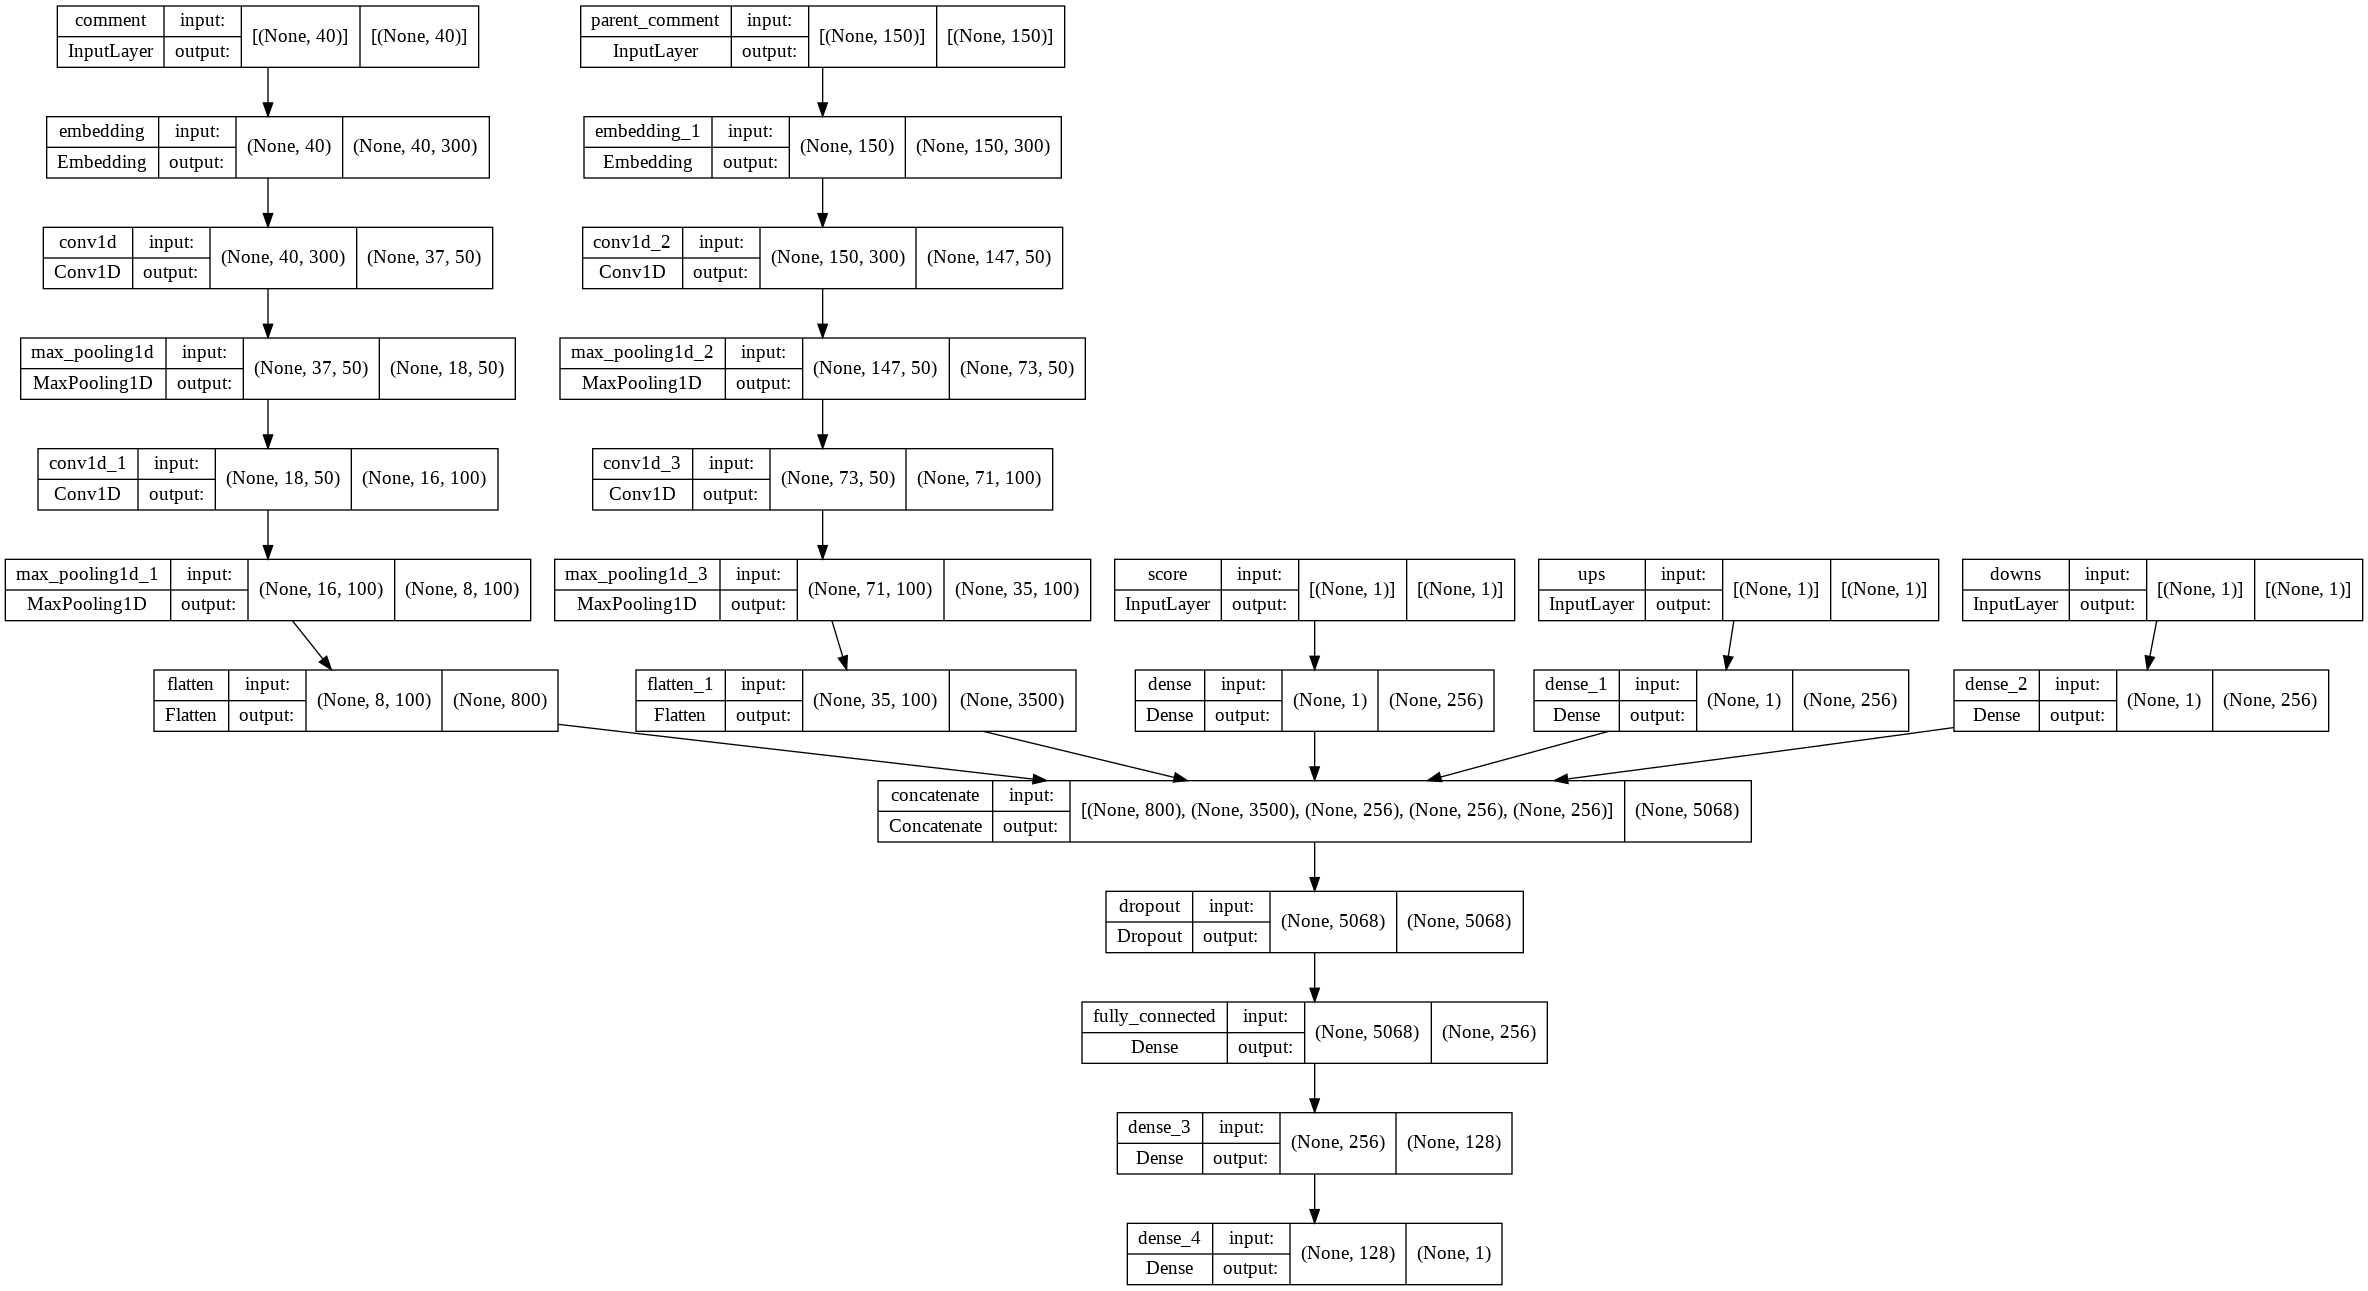

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_5,
           to_file = 'Model_5.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_5.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_padding, 
                X_train_pc_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_pc_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_pc_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_5 = Model_5.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 50s 62ms/step - loss: 0.5917 - accuracy: 0.6786 - precision: 0.7033 - recall: 0.6256 - f1_score: 0.6589 - val_loss: 0.5659 - val_accuracy: 0.7033 - val_precision: 0.7267 - val_recall: 0.6502 - val_f1_score: 0.6861 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 33s 61ms/step - loss: 0.5543 - accuracy: 0.7124 - precision: 0.7375 - recall: 0.6610 - f1_score: 0.6957 - val_loss: 0.5565 - val_accuracy: 0.7113 - val_precision: 0.7248 - val_recall: 0.6803 - val_f1_score: 0.7016 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 34s 62ms/step - loss: 0.5364 - accuracy: 0.7263 - precision: 0.7486 - recall: 0.6830 - f1_score: 0.7129 - val_loss: 0.5563 - val_accuracy: 0.

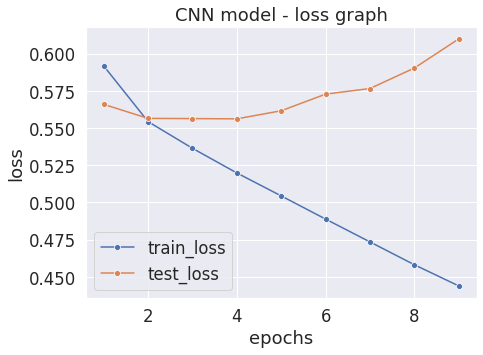

In [ ]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'loss')

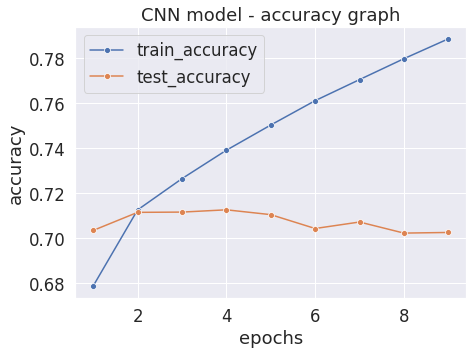

In [ ]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'accuracy')

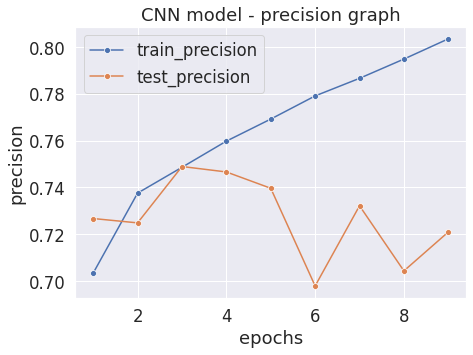

In [ ]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'precision')

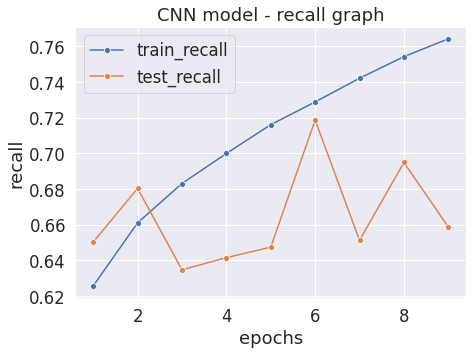

In [ ]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'recall')

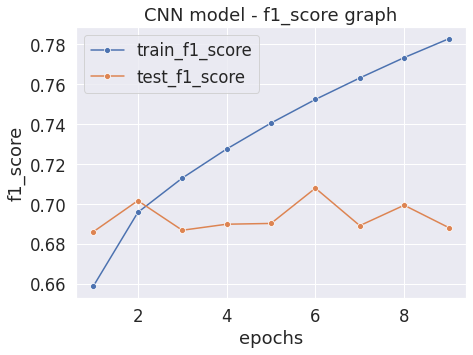

In [ ]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_5.save_weights('/content/drive/MyDrive/Model_5_weights.hdf5')

In [ ]:
'''load_weights'''

Model_5.load_weights('/content/drive/MyDrive/Model_5_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_5.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 88s 5ms/step - loss: 0.4907 - accuracy: 0.7617 - precision: 0.7995 - recall: 0.6971 - f1_score: 0.7382


In [ ]:
l, a, p, r, f = Model_5.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 17s 5ms/step - loss: 0.5562 - accuracy: 0.7125 - precision: 0.7464 - recall: 0.6414 - f1_score: 0.6826


In [ ]:
l, a, p, r, f = Model_5.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 17s 4ms/step - loss: 0.5568 - accuracy: 0.7120 - precision: 0.7439 - recall: 0.6440 - f1_score: 0.6829


In [ ]:
# predicted value
y_pred  = Model_5.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 11s 3ms/step


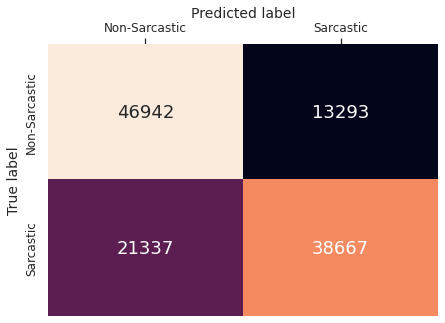

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_8</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Fast Text, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [ ]:
Model_6 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_6.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

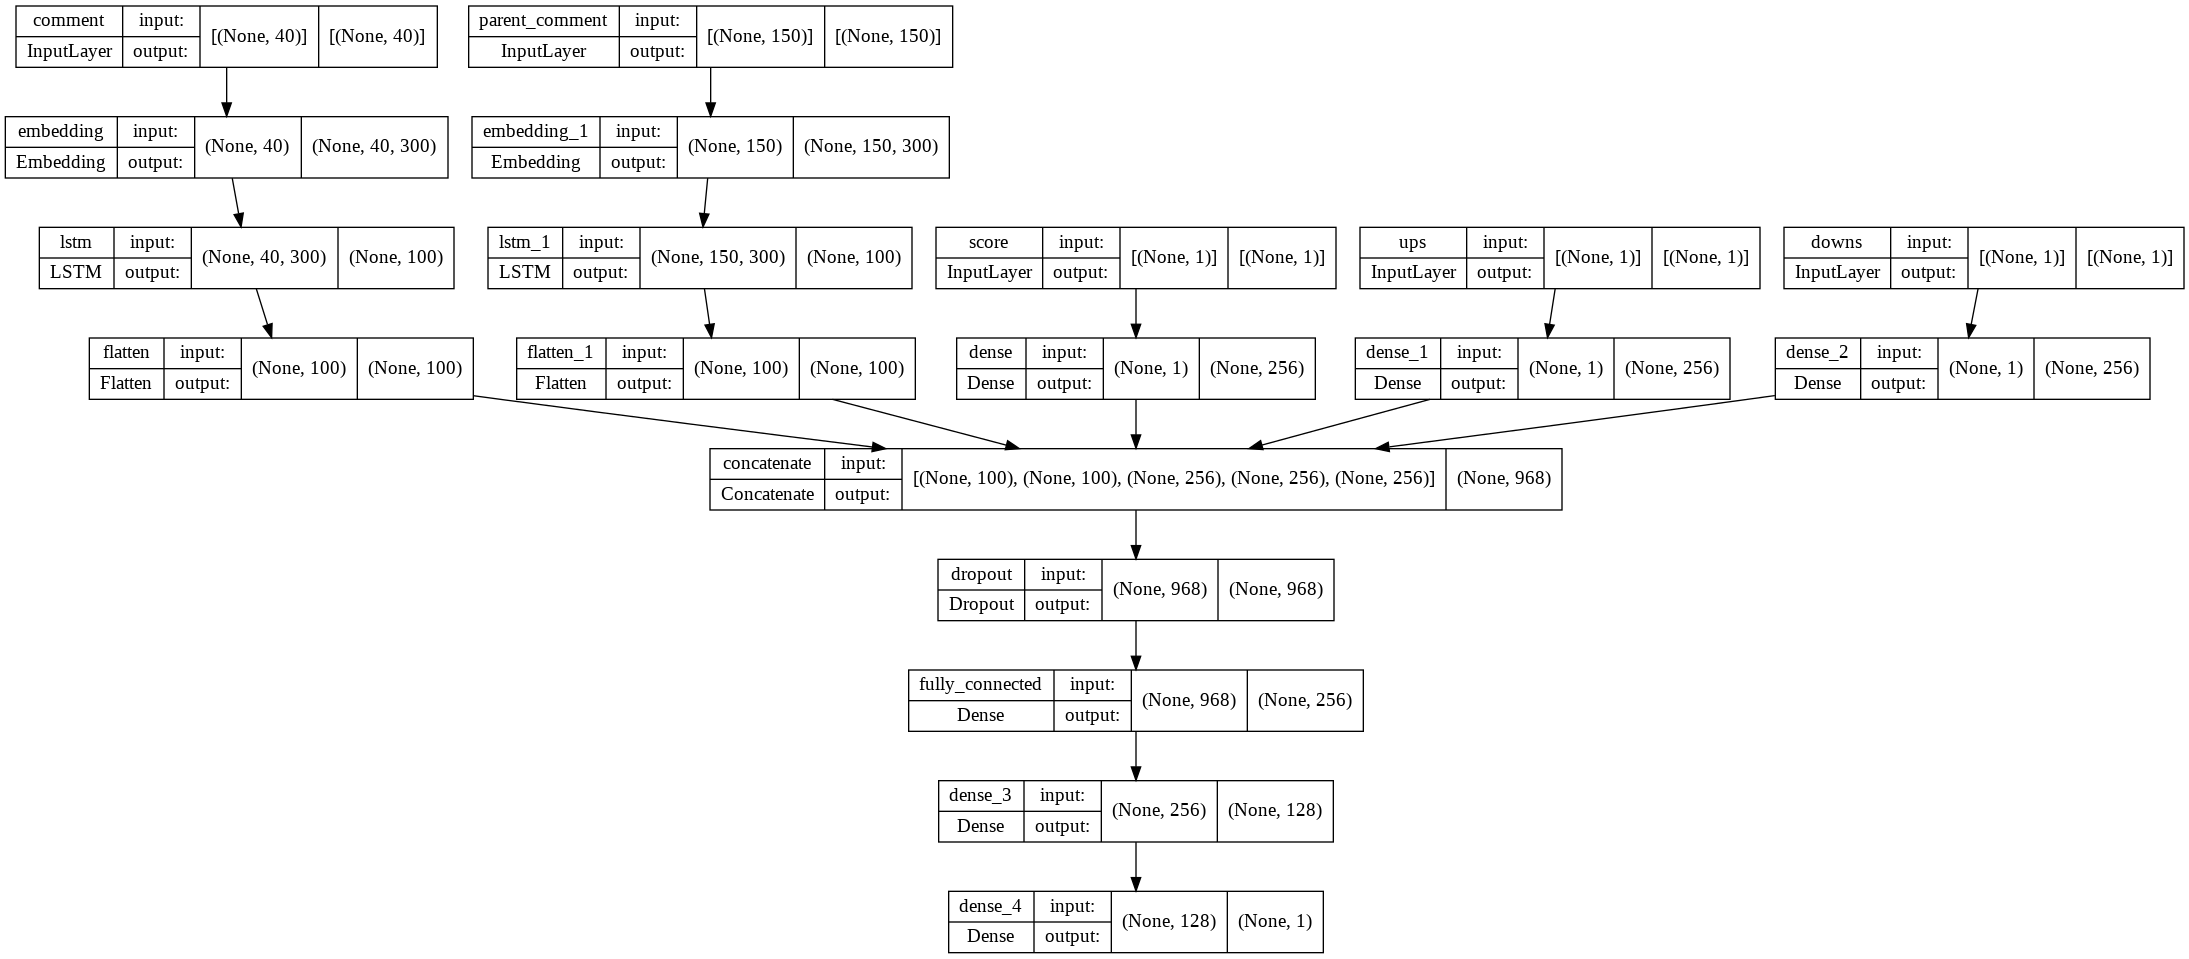

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_6,
           to_file = 'Model_6.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_6.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_padding, 
                X_train_pc_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_pc_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_pc_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_6 = Model_6.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 63s 104ms/step - loss: 0.5878 - accuracy: 0.6827 - precision: 0.6991 - recall: 0.6469 - f1_score: 0.6693 - val_loss: 0.5558 - val_accuracy: 0.7098 - val_precision: 0.7406 - val_recall: 0.6442 - val_f1_score: 0.6888 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 56s 102ms/step - loss: 0.5455 - accuracy: 0.7184 - precision: 0.7397 - recall: 0.6748 - f1_score: 0.7044 - val_loss: 0.5359 - val_accuracy: 0.7255 - val_precision: 0.7549 - val_recall: 0.6663 - val_f1_score: 0.7076 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 54s 98ms/step - loss: 0.5276 - accuracy: 0.7318 - precision: 0.7521 - recall: 0.6927 - f1_score: 0.7200 - val_loss: 0.5291 - val_accuracy: 

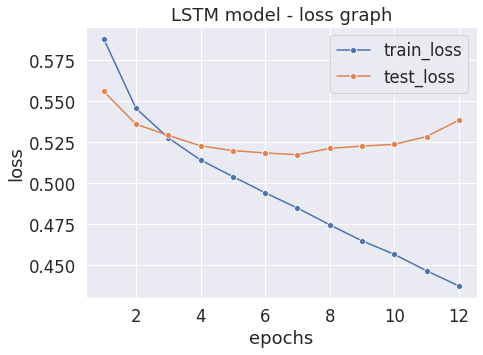

In [ ]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'loss')

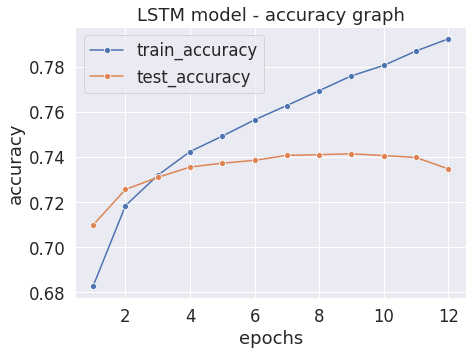

In [ ]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'accuracy')

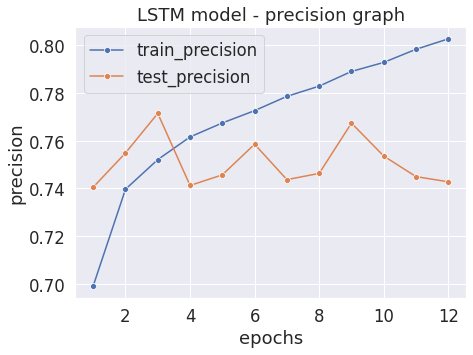

In [ ]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'precision')

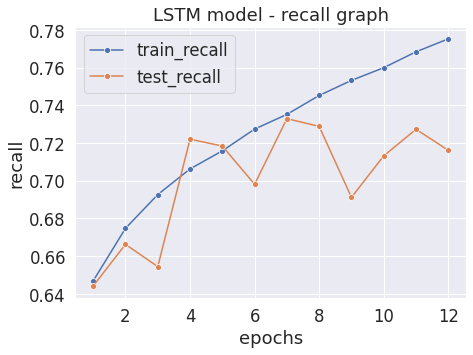

In [ ]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'recall')

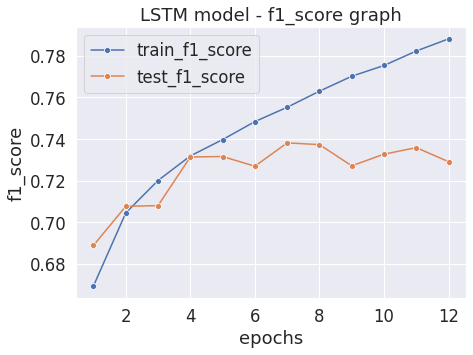

In [ ]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_6.save_weights('/content/drive/MyDrive/Model_6_weights.hdf5')

In [ ]:
'''load_weights'''

Model_6.load_weights('/content/drive/MyDrive/Model_6_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_6.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 126s 7ms/step - loss: 0.4626 - accuracy: 0.7796 - precision: 0.7816 - recall: 0.7745 - f1_score: 0.7724


In [ ]:
l, a, p, r, f = Model_6.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 27s 7ms/step - loss: 0.5174 - accuracy: 0.7406 - precision: 0.7435 - recall: 0.7330 - f1_score: 0.7319


In [ ]:
l, a, p, r, f = Model_6.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 27s 7ms/step - loss: 0.5172 - accuracy: 0.7413 - precision: 0.7440 - recall: 0.7353 - f1_score: 0.7335


In [ ]:
# predicted value
y_pred  = Model_6.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 24s 6ms/step


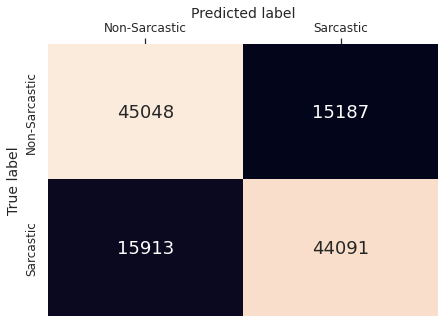

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_9</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Fast Text, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_stop_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_stop_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_stop_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_stop_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_stop_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135102

Embedding_matrix_shape : (135103, 300)


<pre>
<font color = 'blue'><b>Text feature : pre_stop_parent_comment</b><font>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_stop_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_stop_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_stop_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_stop_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199910

Embedding_matrix_shape : (199911, 300)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [ ]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [ ]:
Model_7 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_7.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

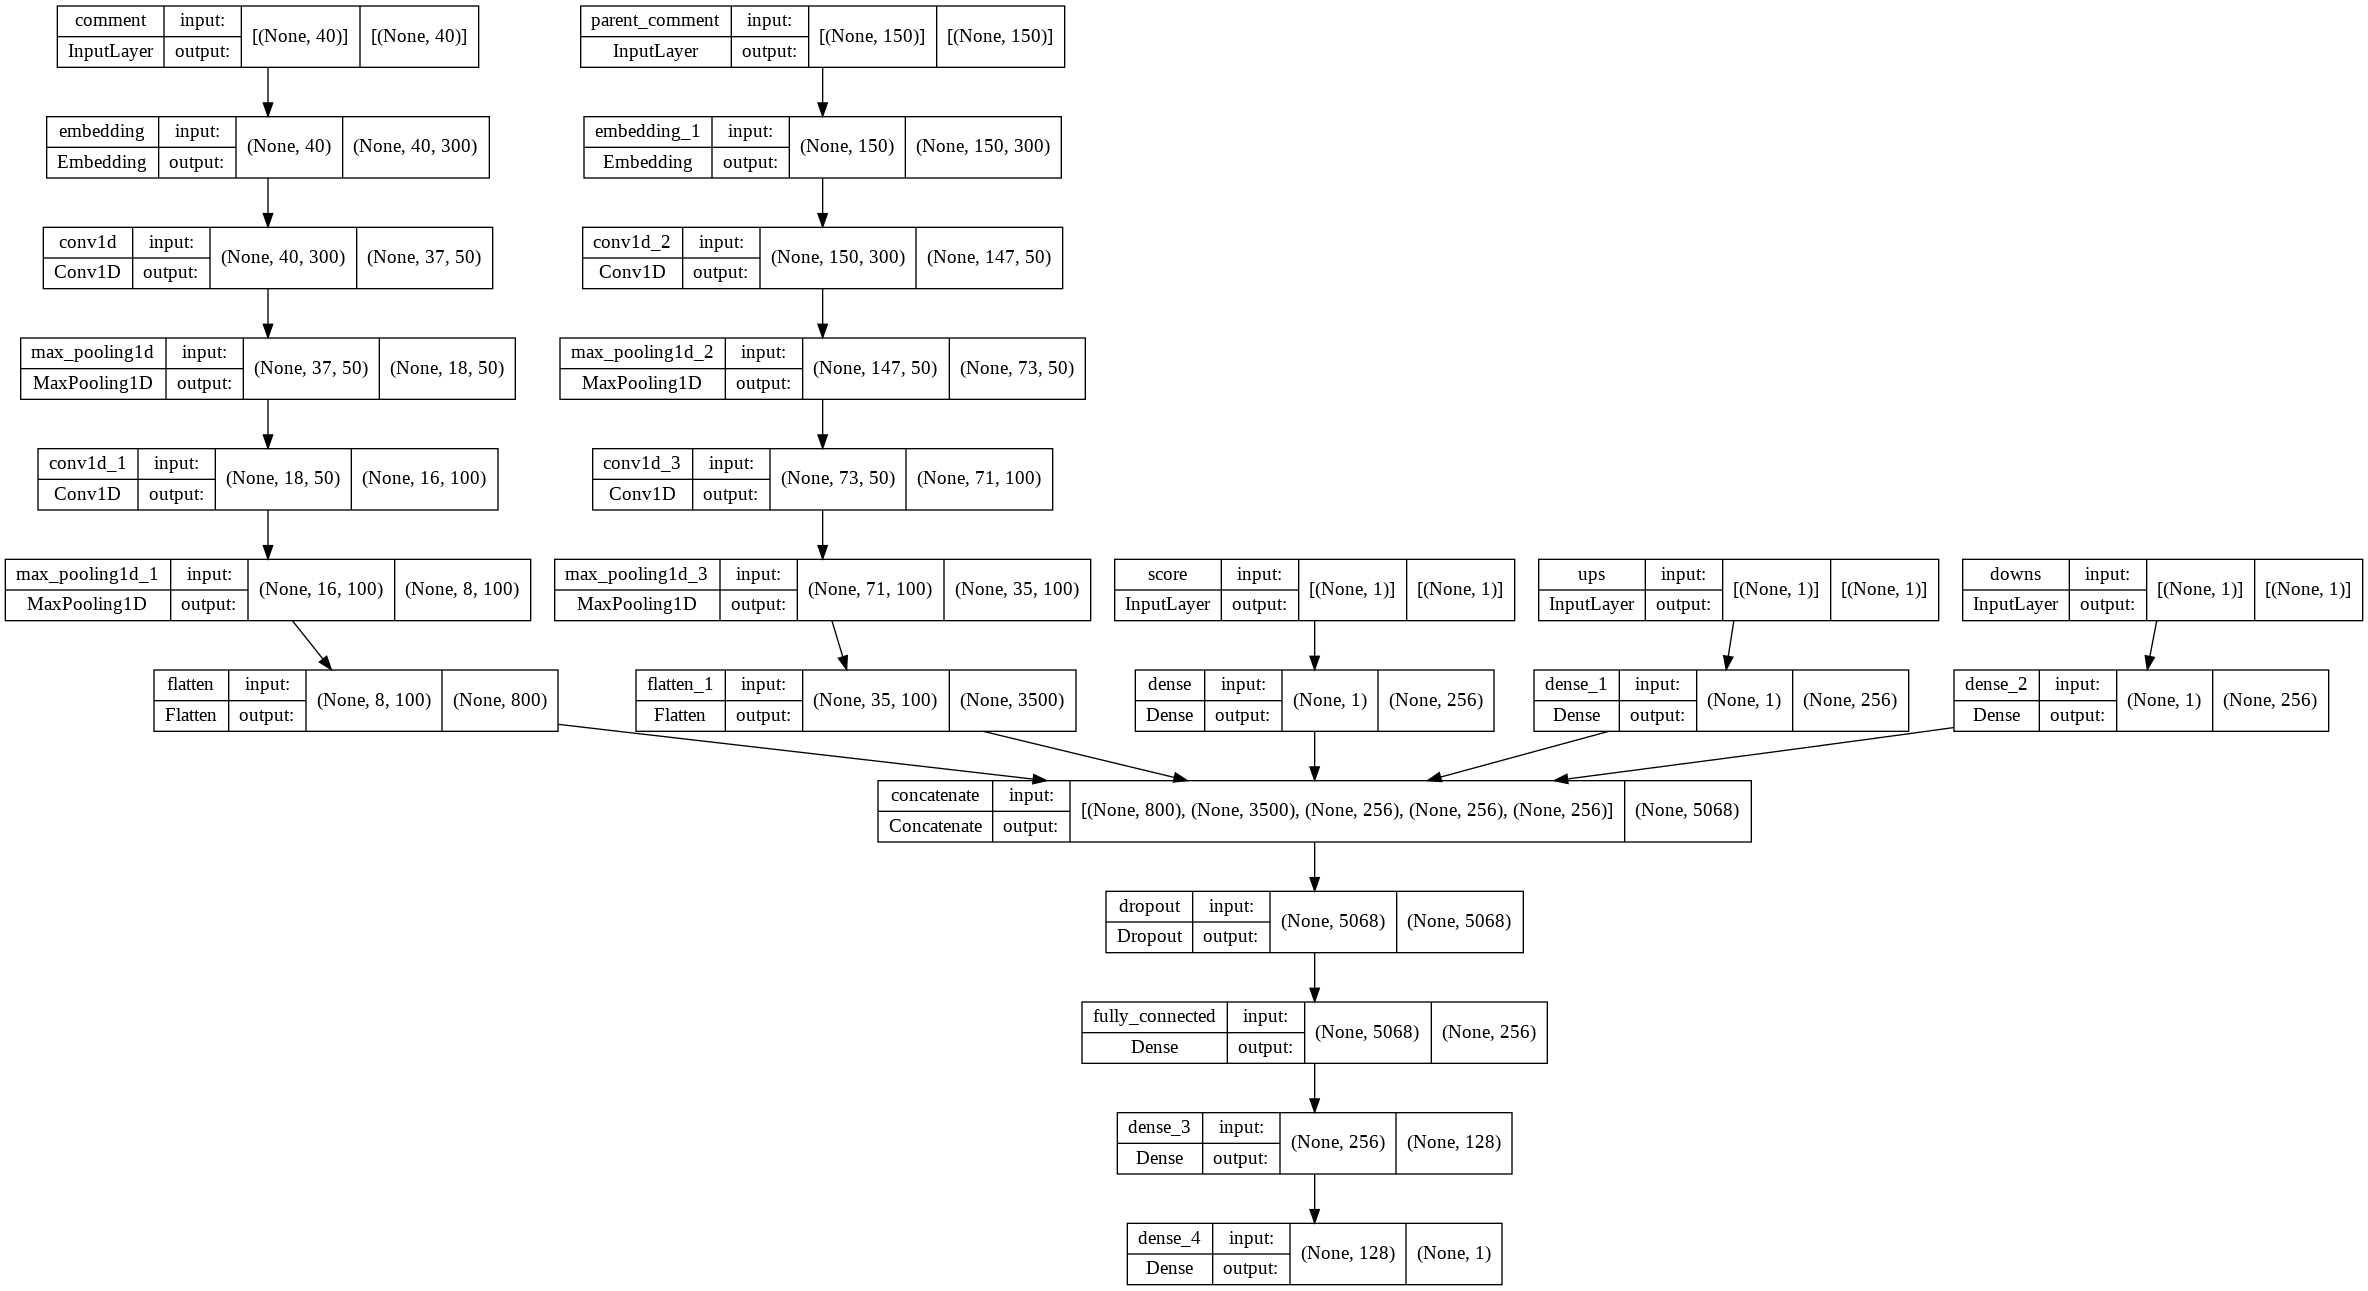

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_7,
           to_file = 'Model_7.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_7.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_stop_padding, 
                X_train_pc_stop_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_pc_stop_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_pc_stop_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_7 = Model_7.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 39s 65ms/step - loss: 0.6209 - accuracy: 0.6494 - precision: 0.6700 - recall: 0.5947 - f1_score: 0.6273 - val_loss: 0.6040 - val_accuracy: 0.6676 - val_precision: 0.6883 - val_recall: 0.6104 - val_f1_score: 0.6468 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 34s 62ms/step - loss: 0.5930 - accuracy: 0.6779 - precision: 0.6983 - recall: 0.6263 - f1_score: 0.6593 - val_loss: 0.5986 - val_accuracy: 0.6724 - val_precision: 0.6855 - val_recall: 0.6346 - val_f1_score: 0.6589 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 33s 60ms/step - loss: 0.5763 - accuracy: 0.6931 - precision: 0.7122 - recall: 0.6488 - f1_score: 0.6778 - val_loss: 0.5993 - val_accuracy: 0.

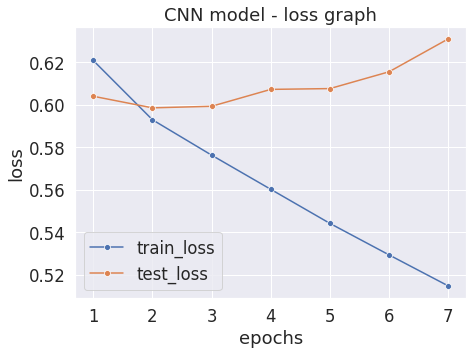

In [ ]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'loss')

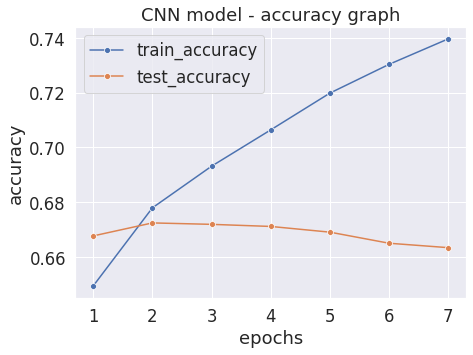

In [ ]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'accuracy')

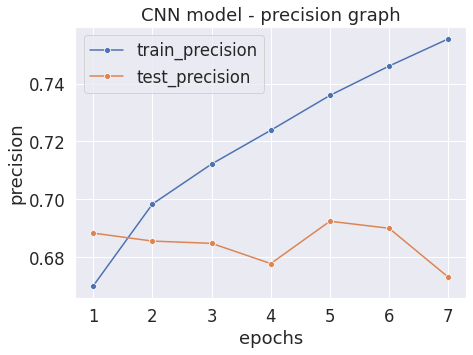

In [ ]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'precision')

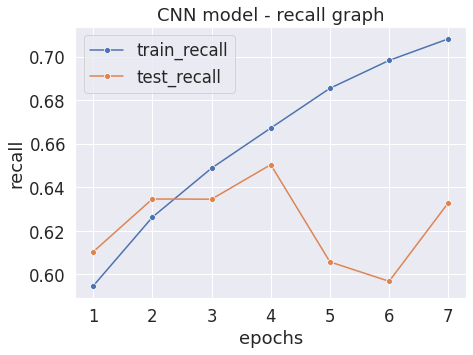

In [ ]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'recall')

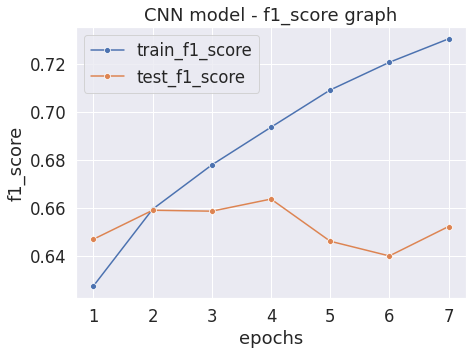

In [ ]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_7.save_weights('/content/drive/MyDrive/Model_7_weights.hdf5')

In [ ]:
'''load_weights'''

Model_7.load_weights('/content/drive/MyDrive/Model_7_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_7.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 82s 5ms/step - loss: 0.5701 - accuracy: 0.6995 - precision: 0.7135 - recall: 0.6645 - f1_score: 0.6809


In [ ]:
l, a, p, r, f = Model_7.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 17s 5ms/step - loss: 0.5986 - accuracy: 0.6724 - precision: 0.6857 - recall: 0.6349 - f1_score: 0.6521


In [ ]:
l, a, p, r, f = Model_7.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 17s 5ms/step - loss: 0.5998 - accuracy: 0.6700 - precision: 0.6821 - recall: 0.6345 - f1_score: 0.6500


In [ ]:
# predicted value
y_pred  = Model_7.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 11s 3ms/step


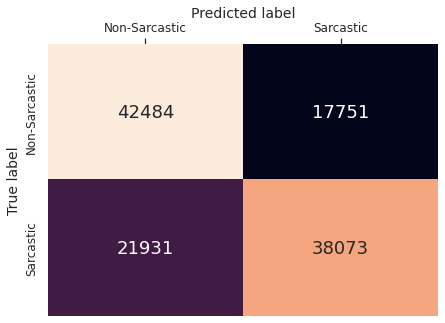

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_10</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Fast Text, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font> 
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [ ]:
Model_8 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [ ]:
Model_8.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

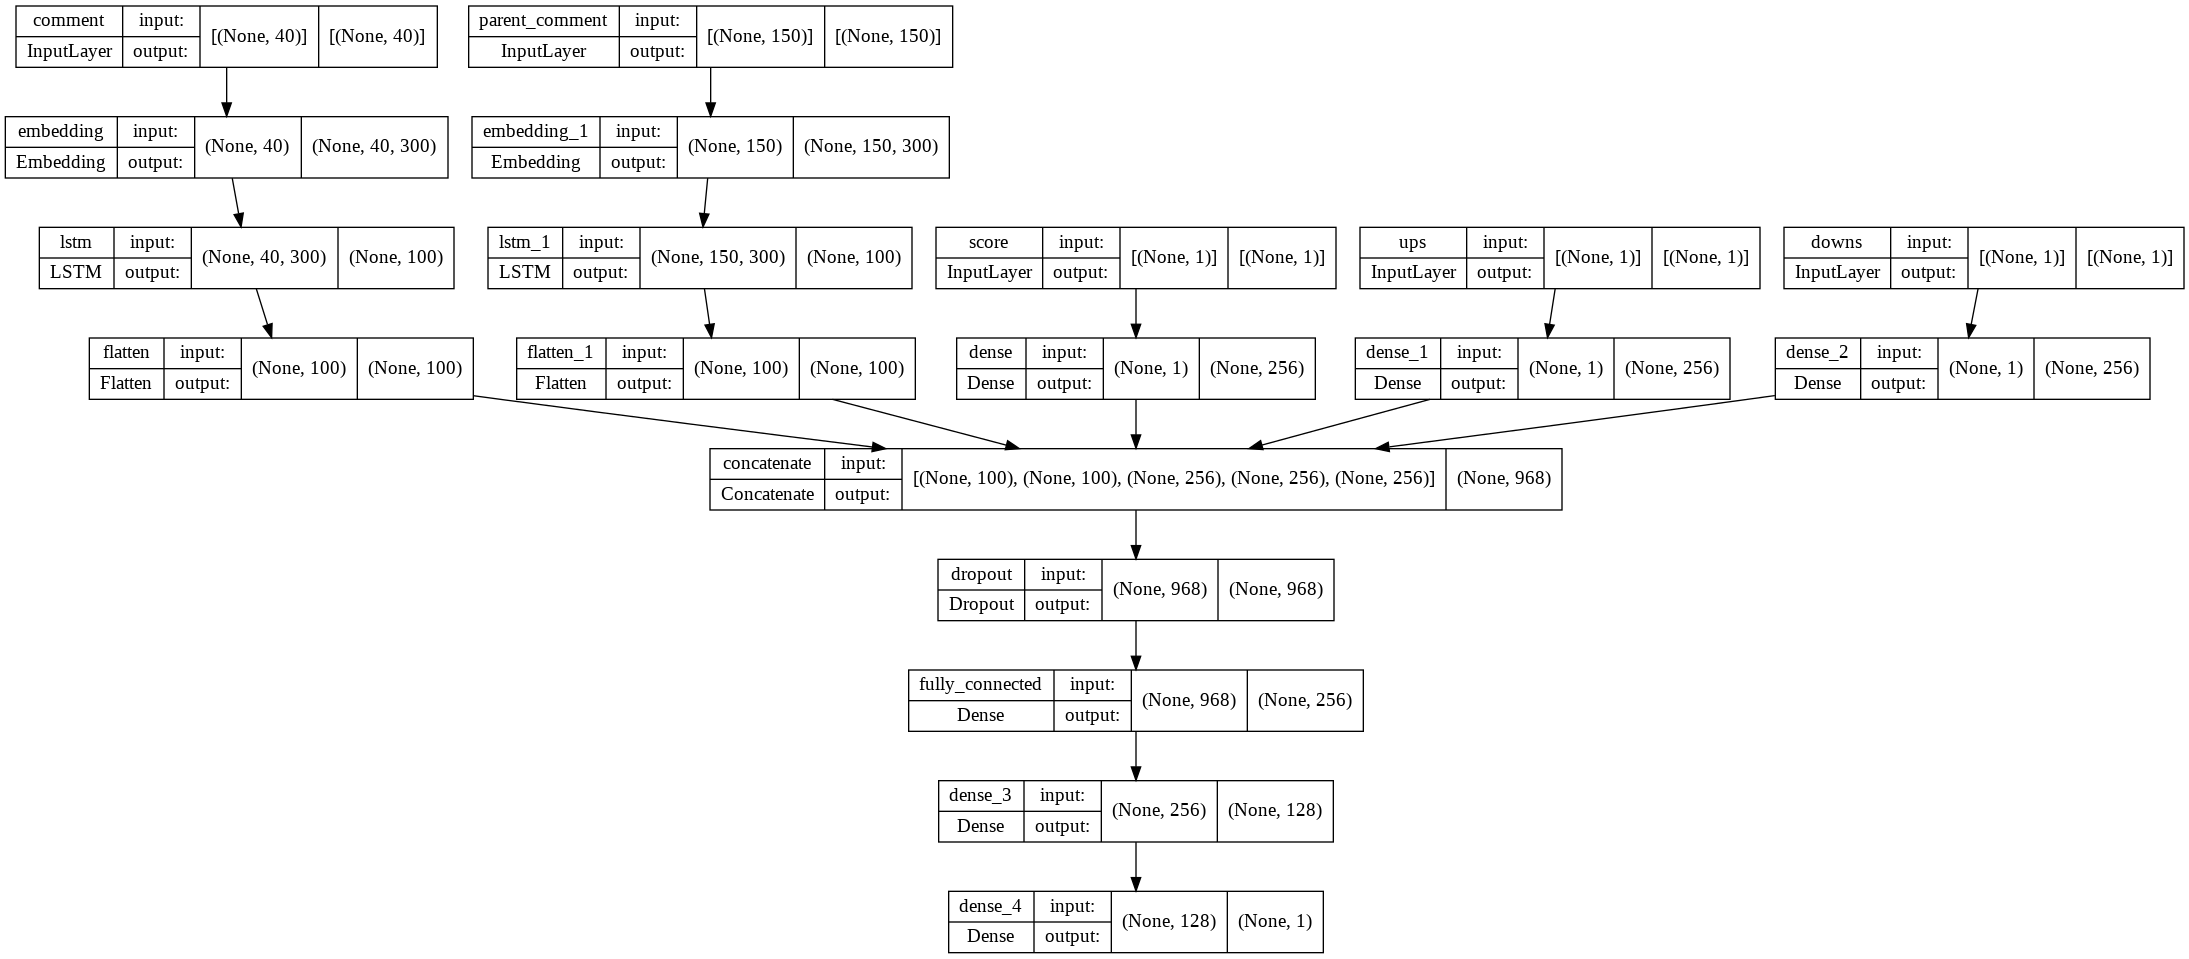

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(Model_8,
           to_file = 'Model_8.png',
           show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam

Model_8.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [ ]:
X_train_data = [X_train_c_stop_padding, 
                X_train_pc_stop_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_pc_stop_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_pc_stop_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [ ]:
history_8 = Model_8.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 62s 103ms/step - loss: 0.6026 - accuracy: 0.6682 - precision: 0.6841 - recall: 0.6284 - f1_score: 0.6525 - val_loss: 0.5786 - val_accuracy: 0.6901 - val_precision: 0.7298 - val_recall: 0.6018 - val_f1_score: 0.6594 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 54s 98ms/step - loss: 0.5670 - accuracy: 0.7003 - precision: 0.7185 - recall: 0.6597 - f1_score: 0.6865 - val_loss: 0.5645 - val_accuracy: 0.7020 - val_precision: 0.7256 - val_recall: 0.6477 - val_f1_score: 0.6842 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 54s 99ms/step - loss: 0.5520 - accuracy: 0.7126 - precision: 0.7304 - recall: 0.6753 - f1_score: 0.7005 - val_loss: 0.5573 - val_accuracy: 0

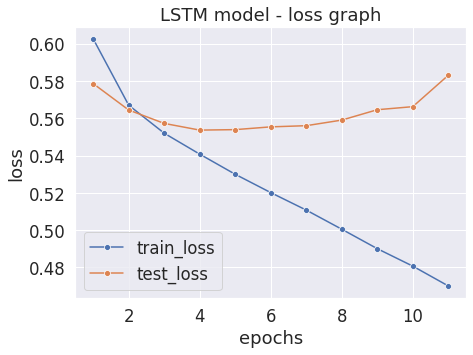

In [ ]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'loss')

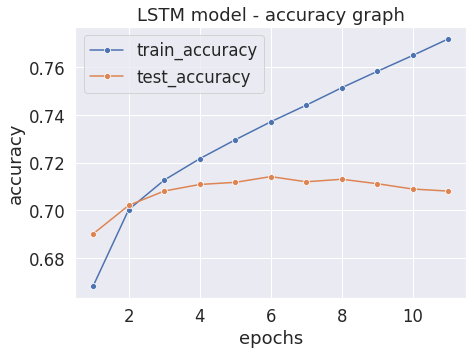

In [ ]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'accuracy')

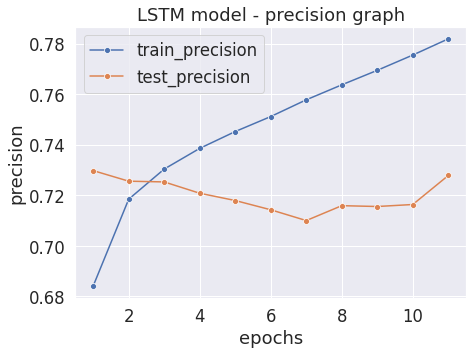

In [ ]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'precision')

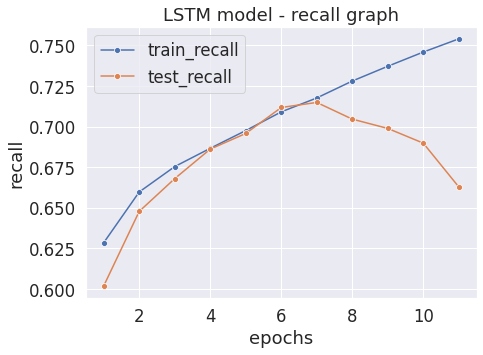

In [ ]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'recall')

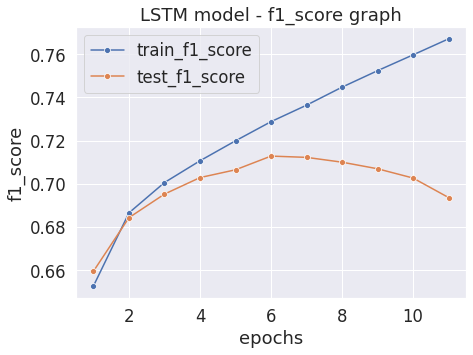

In [ ]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'f1_score')

In [ ]:
'''save_weights'''

Model_8.save_weights('/content/drive/MyDrive/Model_8_weights.hdf5')

In [ ]:
'''load_weights'''

Model_8.load_weights('/content/drive/MyDrive/Model_8_weights.hdf5')

In [ ]:
l, a, p, r, f = Model_8.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 140s 8ms/step - loss: 0.4974 - accuracy: 0.7541 - precision: 0.7537 - recall: 0.7532 - f1_score: 0.7473


In [ ]:
l, a, p, r, f = Model_8.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 28s 7ms/step - loss: 0.5554 - accuracy: 0.7141 - precision: 0.7145 - recall: 0.7121 - f1_score: 0.7066


In [ ]:
l, a, p, r, f = Model_8.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 27s 7ms/step - loss: 0.5543 - accuracy: 0.7132 - precision: 0.7132 - recall: 0.7131 - f1_score: 0.7065


In [ ]:
# predicted value
y_pred  = Model_8.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 22s 6ms/step


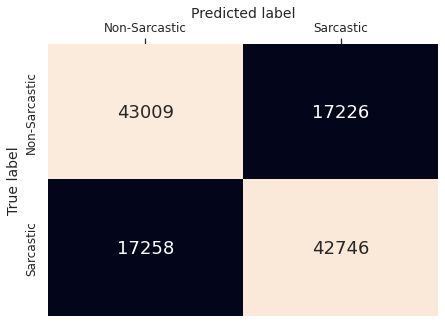

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>prettytable</b><font>

In [ ]:
from prettytable import PrettyTable

#
table = PrettyTable()

table.field_names  = ['Model', 'Pre-Processing', 'Pre-Trained Embedding', 'Train_accuracy', 'Test_accuracy']

table.add_row(['Logistic Regression', '(with stopwords)', 'TF-IDF', 0.7785, 0.7195])
table.add_row(['Logistic Regression', '(without stopwords)', 'TF-IDF', 0.7575, 0.6899])
table.add_row(['Convolutional Neural Network', '(with stopwords)', 'Global Vectors', 0.7333, 0.7056])
table.add_row(['Long Short Term Memory', '(with stopwords)', 'Global Vectors', 0.7638, 0.7356])
table.add_row(['Convolutional Neural Network', '(without stopwords)', 'Global Vectors', 0.6906, 0.6657])
table.add_row(['Long Short Term Memory ', '(without stopwords)', 'Global Vectors', 0.7374, 0.7082])
table.add_row(['Convolutional Neural Network ', '(with stopwords)', 'FastText', 0.7617, 0.7120])
table.add_row(['Long Short Term Memory ', '(with stopwords)', 'FastText', 0.7796, 0.7413])
table.add_row(['Convolutional Neural Network ', '(without stopwords)', 'FastText', 0.6995, 0.6700])
table.add_row(['Long Short Term Memory ', '(without stopwords)', 'FastText', 0.7541, 0.7132])

print(table)

+-------------------------------+---------------------+-----------------------+----------------+---------------+
|             Model             |    Pre-Processing   | Pre-Trained Embedding | Train_accuracy | Test_accuracy |
+-------------------------------+---------------------+-----------------------+----------------+---------------+
|      Logistic Regression      |   (with stopwords)  |         TF-IDF        |     0.7785     |     0.7195    |
|      Logistic Regression      | (without stopwords) |         TF-IDF        |     0.7575     |     0.6899    |
|  Convolutional Neural Network |   (with stopwords)  |     Global Vectors    |     0.7333     |     0.7056    |
|     Long Short Term Memory    |   (with stopwords)  |     Global Vectors    |     0.7638     |     0.7356    |
|  Convolutional Neural Network | (without stopwords) |     Global Vectors    |     0.6906     |     0.6657    |
|    Long Short Term Memory     | (without stopwords) |     Global Vectors    |     0.7374     |

<pre>
Out of all the models, LSTM with stopwords and fastTEXT embedding turned out to be the best model giving 0.7413 accuracy